Instructions for build are here: https://github.com/eho-tacc/episimlab/issues/26

In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
import pandas as pd
import numpy as np
import xarray as xr
from xarray.ufuncs import isnan
import xsimlab as xs
from episimlab.partition import partition
from episimlab.setup.coords import InitDefaultCoords
import multiprocessing as mp
from datetime import datetime
from scripts.DemoATX import main
import matplotlib.pyplot as plt


# Run `episimlab` with Austin-Round Rock MSA parameters

There are two levels at which parameters are exposed to the user:

- configuration YAML file specifies all SEIR model parameters **except** beta (transmission probability)
- command line args to the model runner are used to specify initial model state and simulation duration

In [142]:
cli_pars = {
    'n_cores': 2,
    'config_fp': '/Users/kpierce/episimlab/scripts/DemoATX.yaml',
    'travel_fp': '/Users/kpierce/episimlab/data/full_first_wave_2020_travel.csv',
    'contacts_fp': '/Users/kpierce/episimlab/data/polymod_contacts.csv',
    'census_counts_csv': '/Users/kpierce/episimlab/data/data_lccf/census_pop1_rows1.csv',
    'beta': 0.035,
    'initial_ia': 10,
    'start_date': '3/11/2020',
    'end_date': '9/21/2020',
    'initial_vertex': 78746#78712
}

DEBUG:root:'load_travel_df' took 6.31 seconds
DEBUG:root:step_start: 2020-03-11T00:00:00.000000000
DEBUG:root:step_end: 2020-03-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:07:46.355597


The date in Partition.get_travel_df is ['2020-03-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:08:00.023448
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:08:00.024172
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:08:11.413409
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:08:20.587713
DEBUG:root:'dask_partition' took 37.46 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:08:24.044230
DEBUG:root:step_start: NaT
DEBUG:root:step_end: 2020-03-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:08:24.945038


The date in Partition.get_travel_df is ['2020-03-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:08:34.397155
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:08:34.397924
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:08:42.374472
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:08:50.295533
DEBUG:root:'dask_partition' took 28.63 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:08:53.904234
DEBUG:root:step_start: 2020-03-11T00:00:00.000000000
DEBUG:root:step_end: 2020-03-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:08:54.149766


The date in Partition.get_travel_df is ['2020-03-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:09:03.126914
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:09:03.127631
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:09:11.107812
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:09:18.941315
DEBUG:root:'dask_partition' took 27.72 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:09:22.137012
DEBUG:root:step_start: 2020-03-12T00:00:00.000000000
DEBUG:root:step_end: 2020-03-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:09:22.332991


The date in Partition.get_travel_df is ['2020-03-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:09:31.039449
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:09:31.040222
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:09:38.708369
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:09:46.921480
DEBUG:root:'dask_partition' took 27.78 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:09:50.383815
DEBUG:root:step_start: 2020-03-13T00:00:00.000000000
DEBUG:root:step_end: 2020-03-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:09:50.611154


The date in Partition.get_travel_df is ['2020-03-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:09:59.620230
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:09:59.621035
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:10:08.211613
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:10:17.024193
DEBUG:root:'dask_partition' took 29.62 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:10:20.550857
DEBUG:root:step_start: 2020-03-14T00:00:00.000000000
DEBUG:root:step_end: 2020-03-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:10:20.759305


The date in Partition.get_travel_df is ['2020-03-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:10:29.488171
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:10:29.489013
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:10:37.626773
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:10:46.048270
DEBUG:root:'dask_partition' took 28.67 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:10:49.689870
DEBUG:root:step_start: 2020-03-15T00:00:00.000000000
DEBUG:root:step_end: 2020-03-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:10:49.925534


The date in Partition.get_travel_df is ['2020-03-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:11:00.348977
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:11:00.349809
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:11:09.062982
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:11:17.364284
DEBUG:root:'dask_partition' took 30.75 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:11:20.996686
DEBUG:root:step_start: 2020-03-16T00:00:00.000000000
DEBUG:root:step_end: 2020-03-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:11:21.325973


The date in Partition.get_travel_df is ['2020-03-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:11:31.618020
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:11:31.618782
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:11:40.655632
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:11:50.035198
DEBUG:root:'dask_partition' took 32.20 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:11:53.858771
DEBUG:root:step_start: 2020-03-17T00:00:00.000000000
DEBUG:root:step_end: 2020-03-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:11:54.107043


The date in Partition.get_travel_df is ['2020-03-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:12:05.372767
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:12:05.373513
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:12:13.918903
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:12:22.718921
DEBUG:root:'dask_partition' took 31.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:12:26.165562
DEBUG:root:step_start: 2020-03-18T00:00:00.000000000
DEBUG:root:step_end: 2020-03-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:12:26.371444


The date in Partition.get_travel_df is ['2020-03-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:12:34.748140
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:12:34.748848
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:12:42.600622
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:12:51.057646
DEBUG:root:'dask_partition' took 28.20 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:12:54.882755
DEBUG:root:step_start: 2020-03-19T00:00:00.000000000
DEBUG:root:step_end: 2020-03-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:12:55.118957


The date in Partition.get_travel_df is ['2020-03-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:13:04.764683
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:13:04.765407
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:13:12.512289
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:13:20.467807
DEBUG:root:'dask_partition' took 28.92 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:13:24.366604
DEBUG:root:step_start: 2020-03-20T00:00:00.000000000
DEBUG:root:step_end: 2020-03-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:13:24.599213


The date in Partition.get_travel_df is ['2020-03-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:13:35.038264
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:13:35.038951
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:13:43.529820
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:13:52.398717
DEBUG:root:'dask_partition' took 31.29 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:13:56.178780
DEBUG:root:step_start: 2020-03-21T00:00:00.000000000
DEBUG:root:step_end: 2020-03-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:13:56.432772


The date in Partition.get_travel_df is ['2020-03-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:14:05.475749
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:14:05.476456
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:14:13.556838
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:14:21.990251
DEBUG:root:'dask_partition' took 28.59 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:14:25.319332
DEBUG:root:step_start: 2020-03-22T00:00:00.000000000
DEBUG:root:step_end: 2020-03-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:14:25.549562


The date in Partition.get_travel_df is ['2020-03-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:14:35.357526
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:14:35.358264
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:14:43.299840
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:14:51.673105
DEBUG:root:'dask_partition' took 29.09 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:14:54.958340
DEBUG:root:step_start: 2020-03-23T00:00:00.000000000
DEBUG:root:step_end: 2020-03-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:14:55.219322


The date in Partition.get_travel_df is ['2020-03-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:15:05.763155
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:15:05.763841
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:15:14.149403
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:15:22.361265
DEBUG:root:'dask_partition' took 30.22 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:15:25.756459
DEBUG:root:step_start: 2020-03-24T00:00:00.000000000
DEBUG:root:step_end: 2020-03-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:15:26.004115


The date in Partition.get_travel_df is ['2020-03-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:15:36.808867
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:15:36.809614
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:15:44.863151
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:15:53.145439
DEBUG:root:'dask_partition' took 30.14 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:15:56.407751
DEBUG:root:step_start: 2020-03-25T00:00:00.000000000
DEBUG:root:step_end: 2020-03-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:15:56.603223


The date in Partition.get_travel_df is ['2020-03-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:16:05.592544
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:16:05.593361
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:16:13.836964
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:16:22.484814
DEBUG:root:'dask_partition' took 29.04 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:16:25.925951
DEBUG:root:step_start: 2020-03-26T00:00:00.000000000
DEBUG:root:step_end: 2020-03-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:16:26.162187


The date in Partition.get_travel_df is ['2020-03-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:16:35.786212
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:16:35.787190
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:16:43.993214
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:16:54.403180
DEBUG:root:'dask_partition' took 31.55 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:16:58.044563
DEBUG:root:step_start: 2020-03-27T00:00:00.000000000
DEBUG:root:step_end: 2020-03-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:16:58.297608


The date in Partition.get_travel_df is ['2020-03-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:17:08.256672
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:17:08.257371
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:17:16.744856
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:17:25.179136
DEBUG:root:'dask_partition' took 30.23 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:17:28.816938
DEBUG:root:step_start: 2020-03-28T00:00:00.000000000
DEBUG:root:step_end: 2020-03-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:17:29.209669


The date in Partition.get_travel_df is ['2020-03-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:17:38.272235
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:17:38.273013
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:17:46.324091
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:17:54.946706
DEBUG:root:'dask_partition' took 29.01 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:17:58.491003
DEBUG:root:step_start: 2020-03-29T00:00:00.000000000
DEBUG:root:step_end: 2020-03-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:17:58.715138


The date in Partition.get_travel_df is ['2020-03-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:18:07.933719
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:18:07.934457
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:18:15.688652
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:18:24.343729
DEBUG:root:'dask_partition' took 28.56 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:18:27.593401
DEBUG:root:step_start: 2020-03-30T00:00:00.000000000
DEBUG:root:step_end: 2020-03-31T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:18:27.790419


The date in Partition.get_travel_df is ['2020-03-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:18:37.109239
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:18:37.109976
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:18:44.917214
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:18:53.538537
DEBUG:root:'dask_partition' took 28.88 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:18:56.961534
DEBUG:root:step_start: 2020-03-31T00:00:00.000000000
DEBUG:root:step_end: 2020-04-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:18:57.173995


The date in Partition.get_travel_df is ['2020-03-31T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:19:06.325517
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:19:06.326571
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:19:14.492012
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:19:22.958832
DEBUG:root:'dask_partition' took 29.22 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:19:26.692864
DEBUG:root:step_start: 2020-04-01T00:00:00.000000000
DEBUG:root:step_end: 2020-04-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:19:26.904981


The date in Partition.get_travel_df is ['2020-04-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:19:36.466073
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:19:36.466935
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:19:45.245614
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:19:53.754192
DEBUG:root:'dask_partition' took 29.89 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:19:57.080719
DEBUG:root:step_start: 2020-04-02T00:00:00.000000000
DEBUG:root:step_end: 2020-04-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:19:57.271755


The date in Partition.get_travel_df is ['2020-04-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:20:06.100078
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:20:06.100801
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:20:13.962230
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:20:22.750315
DEBUG:root:'dask_partition' took 29.18 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:20:26.742292
DEBUG:root:step_start: 2020-04-03T00:00:00.000000000
DEBUG:root:step_end: 2020-04-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:20:26.991430


The date in Partition.get_travel_df is ['2020-04-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:20:37.386348
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:20:37.387025
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:20:46.478182
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:20:55.930119
DEBUG:root:'dask_partition' took 32.55 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:20:59.872781
DEBUG:root:step_start: 2020-04-04T00:00:00.000000000
DEBUG:root:step_end: 2020-04-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:21:00.122576


The date in Partition.get_travel_df is ['2020-04-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:21:08.745460
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:21:08.746256
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:21:17.081920
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:21:25.914849
DEBUG:root:'dask_partition' took 29.12 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:21:29.539072
DEBUG:root:step_start: 2020-04-05T00:00:00.000000000
DEBUG:root:step_end: 2020-04-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:21:29.797085


The date in Partition.get_travel_df is ['2020-04-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:21:39.467315
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:21:39.468114
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:21:47.802101
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:21:56.510194
DEBUG:root:'dask_partition' took 30.00 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:22:00.105641
DEBUG:root:step_start: 2020-04-06T00:00:00.000000000
DEBUG:root:step_end: 2020-04-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:22:00.356338


The date in Partition.get_travel_df is ['2020-04-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:22:09.677958
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:22:09.678704
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:22:17.755757
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:22:26.472178
DEBUG:root:'dask_partition' took 29.29 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:22:29.959654
DEBUG:root:step_start: 2020-04-07T00:00:00.000000000
DEBUG:root:step_end: 2020-04-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:22:30.195589


The date in Partition.get_travel_df is ['2020-04-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:22:39.482878
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:22:39.483664
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:22:47.637272
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:22:56.349892
DEBUG:root:'dask_partition' took 29.09 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:22:59.575015
DEBUG:root:step_start: 2020-04-08T00:00:00.000000000
DEBUG:root:step_end: 2020-04-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:22:59.783786


The date in Partition.get_travel_df is ['2020-04-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:23:08.613981
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:23:08.614750
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:23:16.643052
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:23:25.211266
DEBUG:root:'dask_partition' took 28.80 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:23:28.884506
DEBUG:root:step_start: 2020-04-09T00:00:00.000000000
DEBUG:root:step_end: 2020-04-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:23:29.090402


The date in Partition.get_travel_df is ['2020-04-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:23:38.324320
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:23:38.325073
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:23:47.240722
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:23:55.387923
DEBUG:root:'dask_partition' took 29.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:23:59.203481
DEBUG:root:step_start: 2020-04-10T00:00:00.000000000
DEBUG:root:step_end: 2020-04-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:23:59.454404


The date in Partition.get_travel_df is ['2020-04-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:24:10.230672
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:24:10.231389
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:24:18.652945
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:24:26.699168
DEBUG:root:'dask_partition' took 30.30 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:24:30.058410
DEBUG:root:step_start: 2020-04-11T00:00:00.000000000
DEBUG:root:step_end: 2020-04-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:24:30.299867


The date in Partition.get_travel_df is ['2020-04-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:24:39.450262
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:24:39.451002
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:24:47.440008
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:24:55.889641
DEBUG:root:'dask_partition' took 28.98 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:24:59.568612
DEBUG:root:step_start: 2020-04-12T00:00:00.000000000
DEBUG:root:step_end: 2020-04-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:24:59.801323


The date in Partition.get_travel_df is ['2020-04-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:25:09.447451
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:25:09.448221
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:25:17.717215
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:25:26.058154
DEBUG:root:'dask_partition' took 29.48 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:25:29.559089
DEBUG:root:step_start: 2020-04-13T00:00:00.000000000
DEBUG:root:step_end: 2020-04-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:25:29.769062


The date in Partition.get_travel_df is ['2020-04-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:25:38.199926
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:25:38.200664
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:25:46.286256
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:25:55.124639
DEBUG:root:'dask_partition' took 28.64 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:25:58.704955
DEBUG:root:step_start: 2020-04-14T00:00:00.000000000
DEBUG:root:step_end: 2020-04-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:25:58.925167


The date in Partition.get_travel_df is ['2020-04-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:26:08.595708
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:26:08.597568
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:26:16.594079
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:26:25.596359
DEBUG:root:'dask_partition' took 30.28 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:26:29.542858
DEBUG:root:step_start: 2020-04-15T00:00:00.000000000
DEBUG:root:step_end: 2020-04-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:26:29.793359


The date in Partition.get_travel_df is ['2020-04-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:26:40.529022
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:26:40.529740
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:26:49.526416
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:26:58.652470
DEBUG:root:'dask_partition' took 32.31 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:27:02.452410
DEBUG:root:step_start: 2020-04-16T00:00:00.000000000
DEBUG:root:step_end: 2020-04-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:27:02.730532


The date in Partition.get_travel_df is ['2020-04-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:27:13.471797
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:27:13.472569
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:27:22.266402
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:27:31.115219
DEBUG:root:'dask_partition' took 32.02 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:27:35.042720
DEBUG:root:step_start: 2020-04-17T00:00:00.000000000
DEBUG:root:step_end: 2020-04-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:27:35.291807


The date in Partition.get_travel_df is ['2020-04-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:27:45.580338
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:27:45.581461
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:27:55.233559
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:28:04.151789
DEBUG:root:'dask_partition' took 32.23 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:28:07.794554
DEBUG:root:step_start: 2020-04-18T00:00:00.000000000
DEBUG:root:step_end: 2020-04-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:28:08.025983


The date in Partition.get_travel_df is ['2020-04-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:28:16.477118
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:28:16.477831
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:28:24.255125
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:28:31.982189
DEBUG:root:'dask_partition' took 26.96 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:28:35.272460
DEBUG:root:step_start: 2020-04-19T00:00:00.000000000
DEBUG:root:step_end: 2020-04-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:28:35.478780


The date in Partition.get_travel_df is ['2020-04-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:28:44.088869
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:28:44.089608
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:28:51.839057
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:28:59.534449
DEBUG:root:'dask_partition' took 26.92 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:29:02.703992
DEBUG:root:step_start: 2020-04-20T00:00:00.000000000
DEBUG:root:step_end: 2020-04-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:29:02.909936


The date in Partition.get_travel_df is ['2020-04-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:29:11.076481
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:29:11.077282
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:29:18.591389
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:29:26.383574
DEBUG:root:'dask_partition' took 26.36 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:29:29.529654
DEBUG:root:step_start: 2020-04-21T00:00:00.000000000
DEBUG:root:step_end: 2020-04-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:29:29.727040


The date in Partition.get_travel_df is ['2020-04-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:29:38.205928
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:29:38.206672
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:29:46.062836
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:29:54.192899
DEBUG:root:'dask_partition' took 27.40 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:29:57.411610
DEBUG:root:step_start: 2020-04-22T00:00:00.000000000
DEBUG:root:step_end: 2020-04-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:29:57.604502


The date in Partition.get_travel_df is ['2020-04-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:30:05.804827
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:30:05.805584
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:30:14.004513
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:30:22.084096
DEBUG:root:'dask_partition' took 27.40 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:30:25.269668
DEBUG:root:step_start: 2020-04-23T00:00:00.000000000
DEBUG:root:step_end: 2020-04-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:30:25.491549


The date in Partition.get_travel_df is ['2020-04-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:30:33.861595
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:30:33.862333
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:30:41.723673
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:30:49.673342
DEBUG:root:'dask_partition' took 27.08 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:30:52.853591
DEBUG:root:step_start: 2020-04-24T00:00:00.000000000
DEBUG:root:step_end: 2020-04-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:30:53.060144


The date in Partition.get_travel_df is ['2020-04-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:31:01.287822
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:31:01.288577
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:31:08.902805
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:31:16.636350
DEBUG:root:'dask_partition' took 26.49 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:31:19.810864
DEBUG:root:step_start: 2020-04-25T00:00:00.000000000
DEBUG:root:step_end: 2020-04-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:31:20.010933


The date in Partition.get_travel_df is ['2020-04-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:31:28.458157
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:31:28.458915
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:31:36.204302
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:31:44.174456
DEBUG:root:'dask_partition' took 27.05 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:31:47.342358
DEBUG:root:step_start: 2020-04-26T00:00:00.000000000
DEBUG:root:step_end: 2020-04-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:31:47.537363


The date in Partition.get_travel_df is ['2020-04-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:31:55.803952
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:31:55.804691
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:32:03.574450
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:32:11.646820
DEBUG:root:'dask_partition' took 27.05 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:32:14.860707
DEBUG:root:step_start: 2020-04-27T00:00:00.000000000
DEBUG:root:step_end: 2020-04-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:32:15.057343


The date in Partition.get_travel_df is ['2020-04-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:32:23.286418
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:32:23.287156
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:32:31.059750
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:32:39.192855
DEBUG:root:'dask_partition' took 27.05 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:32:42.377201
DEBUG:root:step_start: 2020-04-28T00:00:00.000000000
DEBUG:root:step_end: 2020-04-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:32:42.569321


The date in Partition.get_travel_df is ['2020-04-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:32:50.664159
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:32:50.664898
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:32:58.249981
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:33:06.149983
DEBUG:root:'dask_partition' took 26.62 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:33:09.459786
DEBUG:root:step_start: 2020-04-29T00:00:00.000000000
DEBUG:root:step_end: 2020-04-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:33:09.649822


The date in Partition.get_travel_df is ['2020-04-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:33:18.165024
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:33:18.165768
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:33:26.201942
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:33:34.150862
DEBUG:root:'dask_partition' took 27.65 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:33:37.577377
DEBUG:root:step_start: 2020-04-30T00:00:00.000000000
DEBUG:root:step_end: 2020-05-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:33:37.777755


The date in Partition.get_travel_df is ['2020-04-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:33:46.068972
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:33:46.069790
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:33:53.554839
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:34:01.170257
DEBUG:root:'dask_partition' took 26.28 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:34:04.317321
DEBUG:root:step_start: 2020-05-01T00:00:00.000000000
DEBUG:root:step_end: 2020-05-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:34:04.522711


The date in Partition.get_travel_df is ['2020-05-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:34:12.994708
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:34:12.995526
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:34:20.416117
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:34:28.384782
DEBUG:root:'dask_partition' took 26.90 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:34:31.672662
DEBUG:root:step_start: 2020-05-02T00:00:00.000000000
DEBUG:root:step_end: 2020-05-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:34:31.867687


The date in Partition.get_travel_df is ['2020-05-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:34:40.171745
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:34:40.172455
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:34:47.942416
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:34:55.984075
DEBUG:root:'dask_partition' took 27.00 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:34:59.140893
DEBUG:root:step_start: 2020-05-03T00:00:00.000000000
DEBUG:root:step_end: 2020-05-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:34:59.337126


The date in Partition.get_travel_df is ['2020-05-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:35:07.448125
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:35:07.448870
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:35:14.965279
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:35:22.879570
DEBUG:root:'dask_partition' took 26.49 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:35:26.089887
DEBUG:root:step_start: 2020-05-04T00:00:00.000000000
DEBUG:root:step_end: 2020-05-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:35:26.313498


The date in Partition.get_travel_df is ['2020-05-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:35:34.818178
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:35:34.818949
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:35:43.558128
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:35:52.251869
DEBUG:root:'dask_partition' took 33.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:36:00.316438
DEBUG:root:step_start: 2020-05-05T00:00:00.000000000
DEBUG:root:step_end: 2020-05-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:36:01.013778


The date in Partition.get_travel_df is ['2020-05-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:36:43.294914
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:36:43.330715
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:36:55.437855
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:37:03.843509
DEBUG:root:'dask_partition' took 65.95 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:37:07.293077
DEBUG:root:step_start: 2020-05-06T00:00:00.000000000
DEBUG:root:step_end: 2020-05-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:37:08.480450


The date in Partition.get_travel_df is ['2020-05-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:37:17.614779
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:37:17.615539
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:37:25.744154
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:37:33.764439
DEBUG:root:'dask_partition' took 28.29 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:37:37.068134
DEBUG:root:step_start: 2020-05-07T00:00:00.000000000
DEBUG:root:step_end: 2020-05-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:37:37.261555


The date in Partition.get_travel_df is ['2020-05-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:37:45.512667
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:37:45.513493
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:37:53.146281
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:38:01.066997
DEBUG:root:'dask_partition' took 26.74 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:38:04.296147
DEBUG:root:step_start: 2020-05-08T00:00:00.000000000
DEBUG:root:step_end: 2020-05-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:38:04.497720


The date in Partition.get_travel_df is ['2020-05-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:38:13.077513
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:38:13.078272
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:38:21.159157
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:38:30.126204
DEBUG:root:'dask_partition' took 28.81 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:38:33.570281
DEBUG:root:step_start: 2020-05-09T00:00:00.000000000
DEBUG:root:step_end: 2020-05-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:38:33.909073


The date in Partition.get_travel_df is ['2020-05-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:38:54.800282
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:38:54.807170
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:39:13.675400
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:39:30.905166
DEBUG:root:'dask_partition' took 61.69 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:39:35.940816
DEBUG:root:step_start: 2020-05-10T00:00:00.000000000
DEBUG:root:step_end: 2020-05-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:39:36.859971


The date in Partition.get_travel_df is ['2020-05-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:39:48.525608
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:39:48.526313
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:39:57.866165
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:40:06.855931
DEBUG:root:'dask_partition' took 33.20 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:40:10.391293
DEBUG:root:step_start: 2020-05-11T00:00:00.000000000
DEBUG:root:step_end: 2020-05-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:40:10.625155


The date in Partition.get_travel_df is ['2020-05-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:40:18.860398
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:40:18.861194
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:40:28.274209
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:40:37.151312
DEBUG:root:'dask_partition' took 29.87 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:40:40.761064
DEBUG:root:step_start: 2020-05-12T00:00:00.000000000
DEBUG:root:step_end: 2020-05-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:40:41.139199


The date in Partition.get_travel_df is ['2020-05-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:40:49.609437
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:40:49.610204
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:40:57.655455
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:41:05.740159
DEBUG:root:'dask_partition' took 27.57 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:41:09.005833
DEBUG:root:step_start: 2020-05-13T00:00:00.000000000
DEBUG:root:step_end: 2020-05-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:41:09.208667


The date in Partition.get_travel_df is ['2020-05-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:41:17.971257
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:41:17.971994
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:41:26.570512
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:41:35.024998
DEBUG:root:'dask_partition' took 29.06 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:41:38.521577
DEBUG:root:step_start: 2020-05-14T00:00:00.000000000
DEBUG:root:step_end: 2020-05-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:41:38.719379


The date in Partition.get_travel_df is ['2020-05-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:41:47.271265
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:41:47.272002
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:41:55.272519
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:42:03.111973
DEBUG:root:'dask_partition' took 27.31 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:42:06.313706
DEBUG:root:step_start: 2020-05-15T00:00:00.000000000
DEBUG:root:step_end: 2020-05-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:42:06.508294


The date in Partition.get_travel_df is ['2020-05-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:42:15.147191
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:42:15.147928
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:42:22.887779
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:42:31.544493
DEBUG:root:'dask_partition' took 28.41 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:42:35.177202
DEBUG:root:step_start: 2020-05-16T00:00:00.000000000
DEBUG:root:step_end: 2020-05-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:42:35.409250


The date in Partition.get_travel_df is ['2020-05-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:42:44.025674
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:42:44.026386
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:42:51.497559
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:42:59.330006
DEBUG:root:'dask_partition' took 26.88 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:43:02.534535
DEBUG:root:step_start: 2020-05-17T00:00:00.000000000
DEBUG:root:step_end: 2020-05-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:43:02.753376


The date in Partition.get_travel_df is ['2020-05-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:43:11.071928
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:43:11.072771
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:43:19.000518
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:43:27.240234
DEBUG:root:'dask_partition' took 27.49 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:43:30.531843
DEBUG:root:step_start: 2020-05-18T00:00:00.000000000
DEBUG:root:step_end: 2020-05-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:43:30.814912


The date in Partition.get_travel_df is ['2020-05-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:43:39.245925
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:43:39.246667
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:43:47.346481
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:43:55.439611
DEBUG:root:'dask_partition' took 27.58 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:43:58.676824
DEBUG:root:step_start: 2020-05-19T00:00:00.000000000
DEBUG:root:step_end: 2020-05-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:43:58.876370


The date in Partition.get_travel_df is ['2020-05-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:44:07.477073
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:44:07.477758
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:44:15.625735
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:44:23.634339
DEBUG:root:'dask_partition' took 27.68 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:44:26.838679
DEBUG:root:step_start: 2020-05-20T00:00:00.000000000
DEBUG:root:step_end: 2020-05-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:44:27.048115


The date in Partition.get_travel_df is ['2020-05-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:44:35.628911
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:44:35.629670
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:44:43.269469
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:44:51.118369
DEBUG:root:'dask_partition' took 26.94 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:44:54.235610
DEBUG:root:step_start: 2020-05-21T00:00:00.000000000
DEBUG:root:step_end: 2020-05-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:44:54.435942


The date in Partition.get_travel_df is ['2020-05-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:45:02.597696
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:45:02.598454
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:45:10.259381
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:45:18.176509
DEBUG:root:'dask_partition' took 26.65 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:45:21.364420
DEBUG:root:step_start: 2020-05-22T00:00:00.000000000
DEBUG:root:step_end: 2020-05-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:45:21.562519


The date in Partition.get_travel_df is ['2020-05-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:45:29.859832
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:45:29.860560
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:45:37.881644
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:45:45.652822
DEBUG:root:'dask_partition' took 27.01 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:45:48.841720
DEBUG:root:step_start: 2020-05-23T00:00:00.000000000
DEBUG:root:step_end: 2020-05-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:45:49.057734


The date in Partition.get_travel_df is ['2020-05-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:45:57.604657
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:45:57.605395
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:46:05.472068
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:46:13.503384
DEBUG:root:'dask_partition' took 27.37 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:46:16.703947
DEBUG:root:step_start: 2020-05-24T00:00:00.000000000
DEBUG:root:step_end: 2020-05-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:46:16.909598


The date in Partition.get_travel_df is ['2020-05-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:46:24.941013
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:46:24.941851
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:46:33.280097
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:46:41.669491
DEBUG:root:'dask_partition' took 27.74 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:46:44.928364
DEBUG:root:step_start: 2020-05-25T00:00:00.000000000
DEBUG:root:step_end: 2020-05-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:46:45.150790


The date in Partition.get_travel_df is ['2020-05-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:46:53.672556
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:46:53.673292
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:47:01.186951
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:47:09.138869
DEBUG:root:'dask_partition' took 26.88 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:47:12.290450
DEBUG:root:step_start: 2020-05-26T00:00:00.000000000
DEBUG:root:step_end: 2020-05-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:47:12.490280


The date in Partition.get_travel_df is ['2020-05-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:47:20.828338
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:47:20.829242
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:47:28.534111
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:47:36.662777
DEBUG:root:'dask_partition' took 27.05 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:47:39.818776
DEBUG:root:step_start: 2020-05-27T00:00:00.000000000
DEBUG:root:step_end: 2020-05-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:47:40.013436


The date in Partition.get_travel_df is ['2020-05-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:47:48.613238
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:47:48.613983
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:47:56.978978
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:48:05.235626
DEBUG:root:'dask_partition' took 28.14 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:48:08.432541
DEBUG:root:step_start: 2020-05-28T00:00:00.000000000
DEBUG:root:step_end: 2020-05-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:48:08.645190


The date in Partition.get_travel_df is ['2020-05-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:48:16.572088
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:48:16.572894
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:48:24.086446
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:48:31.924612
DEBUG:root:'dask_partition' took 26.34 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:48:35.235469
DEBUG:root:step_start: 2020-05-29T00:00:00.000000000
DEBUG:root:step_end: 2020-05-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:48:35.444845


The date in Partition.get_travel_df is ['2020-05-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:48:44.138233
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:48:44.139508
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:48:51.655401
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:48:59.311446
DEBUG:root:'dask_partition' took 26.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:49:02.458012
DEBUG:root:step_start: 2020-05-30T00:00:00.000000000
DEBUG:root:step_end: 2020-05-31T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:49:02.665652


The date in Partition.get_travel_df is ['2020-05-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:49:11.169809
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:49:11.170651
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:49:18.698157
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:49:26.539629
DEBUG:root:'dask_partition' took 26.83 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:49:29.744862
DEBUG:root:step_start: 2020-05-31T00:00:00.000000000
DEBUG:root:step_end: 2020-06-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:49:29.944782


The date in Partition.get_travel_df is ['2020-05-31T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:49:38.254784
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:49:38.255564
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:49:45.408283
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:49:53.365825
DEBUG:root:'dask_partition' took 26.82 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:49:57.053061
DEBUG:root:step_start: 2020-06-01T00:00:00.000000000
DEBUG:root:step_end: 2020-06-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:49:57.270543


The date in Partition.get_travel_df is ['2020-06-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:50:05.955761
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:50:05.956493
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:50:14.540738
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:50:22.891507
DEBUG:root:'dask_partition' took 28.73 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:50:26.267676
DEBUG:root:step_start: 2020-06-02T00:00:00.000000000
DEBUG:root:step_end: 2020-06-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:50:26.475714


The date in Partition.get_travel_df is ['2020-06-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:50:34.759561
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:50:34.760300
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:50:43.289436
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:50:52.710237
DEBUG:root:'dask_partition' took 30.04 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:50:56.771875
DEBUG:root:step_start: 2020-06-03T00:00:00.000000000
DEBUG:root:step_end: 2020-06-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:50:57.020100


The date in Partition.get_travel_df is ['2020-06-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:51:05.158518
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:51:05.159261
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:51:12.783039
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:51:20.729088
DEBUG:root:'dask_partition' took 26.62 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:51:23.881086
DEBUG:root:step_start: 2020-06-04T00:00:00.000000000
DEBUG:root:step_end: 2020-06-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:51:24.083466


The date in Partition.get_travel_df is ['2020-06-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:51:32.429741
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:51:32.430489
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:51:40.236891
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:51:48.236322
DEBUG:root:'dask_partition' took 27.02 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:51:51.352577
DEBUG:root:step_start: 2020-06-05T00:00:00.000000000
DEBUG:root:step_end: 2020-06-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:51:51.552624


The date in Partition.get_travel_df is ['2020-06-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:51:59.921220
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:51:59.921981
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:52:07.637157
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:52:15.160101
DEBUG:root:'dask_partition' took 26.52 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:52:18.345155
DEBUG:root:step_start: 2020-06-06T00:00:00.000000000
DEBUG:root:step_end: 2020-06-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:52:18.542158


The date in Partition.get_travel_df is ['2020-06-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:52:26.814592
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:52:26.815356
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:52:34.574285
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:52:42.812492
DEBUG:root:'dask_partition' took 27.18 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:52:46.006737
DEBUG:root:step_start: 2020-06-07T00:00:00.000000000
DEBUG:root:step_end: 2020-06-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:52:46.220828


The date in Partition.get_travel_df is ['2020-06-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:52:54.966722
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:52:54.967420
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:53:03.420167
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:53:11.424175
DEBUG:root:'dask_partition' took 28.13 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:53:14.629532
DEBUG:root:step_start: 2020-06-08T00:00:00.000000000
DEBUG:root:step_end: 2020-06-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:53:14.841906


The date in Partition.get_travel_df is ['2020-06-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:53:23.035625
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:53:23.036500
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:53:30.495438
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:53:38.385295
DEBUG:root:'dask_partition' took 26.44 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:53:41.530537
DEBUG:root:step_start: 2020-06-09T00:00:00.000000000
DEBUG:root:step_end: 2020-06-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:53:41.731906


The date in Partition.get_travel_df is ['2020-06-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:53:50.364043
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:53:50.364902
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:53:58.851060
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:54:06.869405
DEBUG:root:'dask_partition' took 28.08 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:54:10.078562
DEBUG:root:step_start: 2020-06-10T00:00:00.000000000
DEBUG:root:step_end: 2020-06-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:54:10.302340


The date in Partition.get_travel_df is ['2020-06-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:54:18.505255
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:54:18.506023
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:54:26.011566
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:54:33.925201
DEBUG:root:'dask_partition' took 26.66 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:54:37.213509
DEBUG:root:step_start: 2020-06-11T00:00:00.000000000
DEBUG:root:step_end: 2020-06-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:54:37.423626


The date in Partition.get_travel_df is ['2020-06-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:54:45.935196
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:54:45.935878
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:54:53.396695
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:55:01.272864
DEBUG:root:'dask_partition' took 26.80 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:55:04.466533
DEBUG:root:step_start: 2020-06-12T00:00:00.000000000
DEBUG:root:step_end: 2020-06-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:55:04.667293


The date in Partition.get_travel_df is ['2020-06-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:55:12.642661
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:55:12.643447
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:55:20.188073
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:55:27.873547
DEBUG:root:'dask_partition' took 26.07 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:55:31.018543
DEBUG:root:step_start: 2020-06-13T00:00:00.000000000
DEBUG:root:step_end: 2020-06-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:55:31.241752


The date in Partition.get_travel_df is ['2020-06-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:55:39.186738
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:55:39.187358
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:55:46.683403
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:55:54.535105
DEBUG:root:'dask_partition' took 26.28 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:55:57.782445
DEBUG:root:step_start: 2020-06-14T00:00:00.000000000
DEBUG:root:step_end: 2020-06-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:55:57.980327


The date in Partition.get_travel_df is ['2020-06-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:56:06.213390
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:56:06.214189
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:56:13.710685
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:56:21.360876
DEBUG:root:'dask_partition' took 26.25 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:56:24.471830
DEBUG:root:step_start: 2020-06-15T00:00:00.000000000
DEBUG:root:step_end: 2020-06-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:56:24.668218


The date in Partition.get_travel_df is ['2020-06-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:56:32.817650
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:56:32.818480
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:56:40.524885
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:56:48.451166
DEBUG:root:'dask_partition' took 26.69 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:56:51.603731
DEBUG:root:step_start: 2020-06-16T00:00:00.000000000
DEBUG:root:step_end: 2020-06-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:56:51.799446


The date in Partition.get_travel_df is ['2020-06-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:57:00.217631
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:57:00.219865
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:57:07.828147
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:57:15.635018
DEBUG:root:'dask_partition' took 26.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:57:18.850864
DEBUG:root:step_start: 2020-06-17T00:00:00.000000000
DEBUG:root:step_end: 2020-06-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:57:19.048886


The date in Partition.get_travel_df is ['2020-06-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:57:27.204616
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:57:27.206289
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:57:35.006927
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:57:42.679516
DEBUG:root:'dask_partition' took 26.47 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:57:45.797196
DEBUG:root:step_start: 2020-06-18T00:00:00.000000000
DEBUG:root:step_end: 2020-06-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:57:45.989378


The date in Partition.get_travel_df is ['2020-06-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:57:54.267009
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:57:54.267759
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:58:02.040146
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:58:10.055392
DEBUG:root:'dask_partition' took 26.99 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:58:13.252011
DEBUG:root:step_start: 2020-06-19T00:00:00.000000000
DEBUG:root:step_end: 2020-06-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:58:13.451295


The date in Partition.get_travel_df is ['2020-06-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:58:22.030379
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:58:22.031125
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:58:29.828399
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:58:38.127011
DEBUG:root:'dask_partition' took 27.86 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:58:41.590587
DEBUG:root:step_start: 2020-06-20T00:00:00.000000000
DEBUG:root:step_end: 2020-06-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:58:41.791651


The date in Partition.get_travel_df is ['2020-06-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:58:50.196287
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:58:50.197037
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:58:57.673915
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:59:05.540514
DEBUG:root:'dask_partition' took 26.77 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:59:08.813835
DEBUG:root:step_start: 2020-06-21T00:00:00.000000000
DEBUG:root:step_end: 2020-06-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:59:09.012660


The date in Partition.get_travel_df is ['2020-06-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:59:17.564324
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:59:17.565053
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:59:25.104106
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:59:32.965464
DEBUG:root:'dask_partition' took 26.85 seconds
DEBUG:root:Building contact xarray at 2021-07-25 23:59:36.104419
DEBUG:root:step_start: 2020-06-22T00:00:00.000000000
DEBUG:root:step_end: 2020-06-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-25 23:59:36.301217


The date in Partition.get_travel_df is ['2020-06-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-25 23:59:44.397572
DEBUG:root:Starting pandas merge 1 at 2021-07-25 23:59:44.398313
DEBUG:root:Starting pandas merge 2 at 2021-07-25 23:59:51.916561
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-25 23:59:59.593471
DEBUG:root:'dask_partition' took 26.83 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:00:03.418235
DEBUG:root:step_start: 2020-06-23T00:00:00.000000000
DEBUG:root:step_end: 2020-06-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:00:03.649220


The date in Partition.get_travel_df is ['2020-06-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:00:12.262250
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:00:12.262991
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:00:20.586634
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:00:28.691893
DEBUG:root:'dask_partition' took 28.14 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:00:32.072819
DEBUG:root:step_start: 2020-06-24T00:00:00.000000000
DEBUG:root:step_end: 2020-06-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:00:32.286750


The date in Partition.get_travel_df is ['2020-06-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:00:40.836540
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:00:40.837319
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:00:50.117326
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:00:58.300606
DEBUG:root:'dask_partition' took 29.15 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:01:01.702448
DEBUG:root:step_start: 2020-06-25T00:00:00.000000000
DEBUG:root:step_end: 2020-06-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:01:01.892193


The date in Partition.get_travel_df is ['2020-06-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:01:10.032202
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:01:10.033040
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:01:18.364097
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:01:26.403342
DEBUG:root:'dask_partition' took 27.50 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:01:29.666138
DEBUG:root:step_start: 2020-06-26T00:00:00.000000000
DEBUG:root:step_end: 2020-06-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:01:29.858382


The date in Partition.get_travel_df is ['2020-06-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:01:38.408729
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:01:38.409464
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:01:46.074686
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:01:53.847158
DEBUG:root:'dask_partition' took 26.87 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:01:56.986404
DEBUG:root:step_start: 2020-06-27T00:00:00.000000000
DEBUG:root:step_end: 2020-06-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:01:57.182757


The date in Partition.get_travel_df is ['2020-06-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:02:05.290143
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:02:05.290885
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:02:12.719354
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:02:20.445208
DEBUG:root:'dask_partition' took 26.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:02:23.583773
DEBUG:root:step_start: 2020-06-28T00:00:00.000000000
DEBUG:root:step_end: 2020-06-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:02:23.778240


The date in Partition.get_travel_df is ['2020-06-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:02:32.028833
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:02:32.029574
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:02:39.803911
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:02:47.538512
DEBUG:root:'dask_partition' took 26.63 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:02:50.678023
DEBUG:root:step_start: 2020-06-29T00:00:00.000000000
DEBUG:root:step_end: 2020-06-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:02:50.874896


The date in Partition.get_travel_df is ['2020-06-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:02:59.257695
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:02:59.258470
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:03:06.791670
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:03:14.479892
DEBUG:root:'dask_partition' took 26.49 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:03:17.611055
DEBUG:root:step_start: 2020-06-30T00:00:00.000000000
DEBUG:root:step_end: 2020-07-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:03:17.803232


The date in Partition.get_travel_df is ['2020-06-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:03:25.945029
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:03:25.945791
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:03:33.482392
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:03:41.404732
DEBUG:root:'dask_partition' took 26.51 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:03:44.557300
DEBUG:root:step_start: 2020-07-01T00:00:00.000000000
DEBUG:root:step_end: 2020-07-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:03:44.750687


The date in Partition.get_travel_df is ['2020-07-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:03:53.172944
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:03:53.173787
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:04:00.709818
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:04:08.366567
DEBUG:root:'dask_partition' took 26.53 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:04:11.505722
DEBUG:root:step_start: 2020-07-02T00:00:00.000000000
DEBUG:root:step_end: 2020-07-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:04:11.685541


The date in Partition.get_travel_df is ['2020-07-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:04:19.751415
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:04:19.752174
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:04:27.167326
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:04:35.104603
DEBUG:root:'dask_partition' took 26.35 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:04:38.285823
DEBUG:root:step_start: 2020-07-03T00:00:00.000000000
DEBUG:root:step_end: 2020-07-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:04:38.481988


The date in Partition.get_travel_df is ['2020-07-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:04:46.863104
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:04:46.863788
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:04:54.269236
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:05:02.033720
DEBUG:root:'dask_partition' took 26.52 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:05:05.252008
DEBUG:root:step_start: 2020-07-04T00:00:00.000000000
DEBUG:root:step_end: 2020-07-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:05:05.453895


The date in Partition.get_travel_df is ['2020-07-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:05:13.711425
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:05:13.712170
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:05:21.321228
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:05:29.201600
DEBUG:root:'dask_partition' took 26.62 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:05:32.343093
DEBUG:root:step_start: 2020-07-05T00:00:00.000000000
DEBUG:root:step_end: 2020-07-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:05:32.564743


The date in Partition.get_travel_df is ['2020-07-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:05:40.997895
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:05:40.998701
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:05:48.591771
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:05:57.966213
DEBUG:root:'dask_partition' took 29.13 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:06:01.977587
DEBUG:root:step_start: 2020-07-06T00:00:00.000000000
DEBUG:root:step_end: 2020-07-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:06:02.332666


The date in Partition.get_travel_df is ['2020-07-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:06:12.797295
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:06:12.798056
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:06:21.094671
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:06:29.163725
DEBUG:root:'dask_partition' took 29.86 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:06:32.406851
DEBUG:root:step_start: 2020-07-07T00:00:00.000000000
DEBUG:root:step_end: 2020-07-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:06:32.622945


The date in Partition.get_travel_df is ['2020-07-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:06:40.692736
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:06:40.694933
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:06:48.281315
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:06:56.115112
DEBUG:root:'dask_partition' took 26.38 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:06:59.290513
DEBUG:root:step_start: 2020-07-08T00:00:00.000000000
DEBUG:root:step_end: 2020-07-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:06:59.509718


The date in Partition.get_travel_df is ['2020-07-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:07:08.252174
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:07:08.252916
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:07:15.979044
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:07:23.831902
DEBUG:root:'dask_partition' took 27.20 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:07:26.982577
DEBUG:root:step_start: 2020-07-09T00:00:00.000000000
DEBUG:root:step_end: 2020-07-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:07:27.202583


The date in Partition.get_travel_df is ['2020-07-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:07:35.625810
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:07:35.626575
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:07:43.786025
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:07:51.850552
DEBUG:root:'dask_partition' took 27.55 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:07:55.017237
DEBUG:root:step_start: 2020-07-10T00:00:00.000000000
DEBUG:root:step_end: 2020-07-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:07:55.266624


The date in Partition.get_travel_df is ['2020-07-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:08:03.871636
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:08:03.872382
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:08:11.730049
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:08:19.645025
DEBUG:root:'dask_partition' took 27.28 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:08:22.812780
DEBUG:root:step_start: 2020-07-11T00:00:00.000000000
DEBUG:root:step_end: 2020-07-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:08:23.026407


The date in Partition.get_travel_df is ['2020-07-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:08:31.521991
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:08:31.522957
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:08:39.453964
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:08:47.331712
DEBUG:root:'dask_partition' took 27.28 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:08:50.597453
DEBUG:root:step_start: 2020-07-12T00:00:00.000000000
DEBUG:root:step_end: 2020-07-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:08:50.815013


The date in Partition.get_travel_df is ['2020-07-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:08:58.995956
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:08:58.996714
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:09:06.904757
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:09:14.934003
DEBUG:root:'dask_partition' took 27.09 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:09:18.191132
DEBUG:root:step_start: 2020-07-13T00:00:00.000000000
DEBUG:root:step_end: 2020-07-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:09:18.398994


The date in Partition.get_travel_df is ['2020-07-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:09:26.857641
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:09:26.858379
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:09:34.706524
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:09:42.810950
DEBUG:root:'dask_partition' took 27.33 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:09:46.008166
DEBUG:root:step_start: 2020-07-14T00:00:00.000000000
DEBUG:root:step_end: 2020-07-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:09:46.215645


The date in Partition.get_travel_df is ['2020-07-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:09:54.376904
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:09:54.377676
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:10:02.065839
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:10:10.115690
DEBUG:root:'dask_partition' took 26.82 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:10:13.294659
DEBUG:root:step_start: 2020-07-15T00:00:00.000000000
DEBUG:root:step_end: 2020-07-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:10:13.508127


The date in Partition.get_travel_df is ['2020-07-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:10:22.013907
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:10:22.014677
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:10:29.592929
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:10:37.564072
DEBUG:root:'dask_partition' took 26.95 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:10:40.735953
DEBUG:root:step_start: 2020-07-16T00:00:00.000000000
DEBUG:root:step_end: 2020-07-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:10:40.954900


The date in Partition.get_travel_df is ['2020-07-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:10:49.040316
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:10:49.041241
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:10:56.852701
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:11:06.896179
DEBUG:root:'dask_partition' took 29.26 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:11:10.476854
DEBUG:root:step_start: 2020-07-17T00:00:00.000000000
DEBUG:root:step_end: 2020-07-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:11:10.707534


The date in Partition.get_travel_df is ['2020-07-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:11:20.180142
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:11:20.181267
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:11:30.122367
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:11:39.202009
DEBUG:root:'dask_partition' took 31.93 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:11:42.906046
DEBUG:root:step_start: 2020-07-18T00:00:00.000000000
DEBUG:root:step_end: 2020-07-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:11:43.115077


The date in Partition.get_travel_df is ['2020-07-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:11:51.794942
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:11:51.795738
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:12:01.397108
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:12:10.571101
DEBUG:root:'dask_partition' took 30.91 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:12:14.341151
DEBUG:root:step_start: 2020-07-19T00:00:00.000000000
DEBUG:root:step_end: 2020-07-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:12:14.580115


The date in Partition.get_travel_df is ['2020-07-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:12:24.148340
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:12:24.150074
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:12:32.471567
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:12:41.104195
DEBUG:root:'dask_partition' took 29.54 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:12:44.420464
DEBUG:root:step_start: 2020-07-20T00:00:00.000000000
DEBUG:root:step_end: 2020-07-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:12:44.656704


The date in Partition.get_travel_df is ['2020-07-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:12:53.988344
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:12:53.989108
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:13:02.515313
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:13:10.934590
DEBUG:root:'dask_partition' took 29.31 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:13:14.264918
DEBUG:root:step_start: 2020-07-21T00:00:00.000000000
DEBUG:root:step_end: 2020-07-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:13:14.511662


The date in Partition.get_travel_df is ['2020-07-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:13:23.933068
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:13:23.933810
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:13:32.174873
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:13:40.597477
DEBUG:root:'dask_partition' took 29.29 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:13:44.105072
DEBUG:root:step_start: 2020-07-22T00:00:00.000000000
DEBUG:root:step_end: 2020-07-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:13:44.352008


The date in Partition.get_travel_df is ['2020-07-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:13:54.052862
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:13:54.053605
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:14:01.888356
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:14:10.247504
DEBUG:root:'dask_partition' took 29.06 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:14:13.683778
DEBUG:root:step_start: 2020-07-23T00:00:00.000000000
DEBUG:root:step_end: 2020-07-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:14:13.914544


The date in Partition.get_travel_df is ['2020-07-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:14:22.868655
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:14:22.869400
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:14:30.776671
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:14:38.928792
DEBUG:root:'dask_partition' took 27.90 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:14:42.096351
DEBUG:root:step_start: 2020-07-24T00:00:00.000000000
DEBUG:root:step_end: 2020-07-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:14:42.307148


The date in Partition.get_travel_df is ['2020-07-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:14:50.594896
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:14:50.595671
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:14:58.221750
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:15:06.223488
DEBUG:root:'dask_partition' took 26.99 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:15:09.578764
DEBUG:root:step_start: 2020-07-25T00:00:00.000000000
DEBUG:root:step_end: 2020-07-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:15:09.793399


The date in Partition.get_travel_df is ['2020-07-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:15:18.052451
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:15:18.053188
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:15:26.017961
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:15:33.739684
DEBUG:root:'dask_partition' took 27.11 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:15:37.176355
DEBUG:root:step_start: 2020-07-26T00:00:00.000000000
DEBUG:root:step_end: 2020-07-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:15:37.409137


The date in Partition.get_travel_df is ['2020-07-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:15:46.479260
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:15:46.480465
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:15:54.589303
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:16:03.101016
DEBUG:root:'dask_partition' took 28.69 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:16:06.365340
DEBUG:root:step_start: 2020-07-27T00:00:00.000000000
DEBUG:root:step_end: 2020-07-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:16:06.567351


The date in Partition.get_travel_df is ['2020-07-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:16:14.954312
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:16:14.955101
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:16:23.067866
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:16:31.645029
DEBUG:root:'dask_partition' took 29.01 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:16:35.917874
DEBUG:root:step_start: 2020-07-28T00:00:00.000000000
DEBUG:root:step_end: 2020-07-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:16:36.371681


The date in Partition.get_travel_df is ['2020-07-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:16:50.162054
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:16:50.162784
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:17:00.985736
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:17:11.670894
DEBUG:root:'dask_partition' took 42.01 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:17:18.728867
DEBUG:root:step_start: 2020-07-29T00:00:00.000000000
DEBUG:root:step_end: 2020-07-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:17:19.031118


The date in Partition.get_travel_df is ['2020-07-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:17:31.272822
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:17:31.273868
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:17:42.811055
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:17:52.480477
DEBUG:root:'dask_partition' took 37.15 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:17:56.427036
DEBUG:root:step_start: 2020-07-30T00:00:00.000000000
DEBUG:root:step_end: 2020-07-31T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:17:56.665544


The date in Partition.get_travel_df is ['2020-07-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:18:05.785959
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:18:05.786873
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:18:17.708342
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:18:27.792616
DEBUG:root:'dask_partition' took 34.24 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:18:31.188626
DEBUG:root:step_start: 2020-07-31T00:00:00.000000000
DEBUG:root:step_end: 2020-08-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:18:31.439359


The date in Partition.get_travel_df is ['2020-07-31T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:18:40.587185
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:18:40.588286
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:18:51.856051
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:19:00.508313
DEBUG:root:'dask_partition' took 32.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:19:03.873017
DEBUG:root:step_start: 2020-08-01T00:00:00.000000000
DEBUG:root:step_end: 2020-08-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:19:04.135611


The date in Partition.get_travel_df is ['2020-08-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:19:13.920728
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:19:13.922115
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:19:23.457794
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:19:31.964160
DEBUG:root:'dask_partition' took 30.88 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:19:35.304833
DEBUG:root:step_start: 2020-08-02T00:00:00.000000000
DEBUG:root:step_end: 2020-08-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:19:35.535106


The date in Partition.get_travel_df is ['2020-08-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:19:45.524812
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:19:45.525597
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:19:54.540725
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:20:02.676737
DEBUG:root:'dask_partition' took 30.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:20:05.991205
DEBUG:root:step_start: 2020-08-03T00:00:00.000000000
DEBUG:root:step_end: 2020-08-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:20:06.229347


The date in Partition.get_travel_df is ['2020-08-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:20:16.827856
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:20:16.831656
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:20:25.730589
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:20:34.040005
DEBUG:root:'dask_partition' took 30.81 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:20:37.345026
DEBUG:root:step_start: 2020-08-04T00:00:00.000000000
DEBUG:root:step_end: 2020-08-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:20:37.590493


The date in Partition.get_travel_df is ['2020-08-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:20:47.246155
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:20:47.246907
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:20:56.435435
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:21:04.773219
DEBUG:root:'dask_partition' took 30.21 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:21:08.081782
DEBUG:root:step_start: 2020-08-05T00:00:00.000000000
DEBUG:root:step_end: 2020-08-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:21:08.317448


The date in Partition.get_travel_df is ['2020-08-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:21:18.292892
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:21:18.293696
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:21:26.820576
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:21:35.388926
DEBUG:root:'dask_partition' took 30.33 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:21:38.985214
DEBUG:root:step_start: 2020-08-06T00:00:00.000000000
DEBUG:root:step_end: 2020-08-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:21:39.219502


The date in Partition.get_travel_df is ['2020-08-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:21:49.403589
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:21:49.404380
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:21:59.045989
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:22:08.206702
DEBUG:root:'dask_partition' took 32.33 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:22:11.849328
DEBUG:root:step_start: 2020-08-07T00:00:00.000000000
DEBUG:root:step_end: 2020-08-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:22:12.106112


The date in Partition.get_travel_df is ['2020-08-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:22:22.649700
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:22:22.650547
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:22:31.002051
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:22:39.203702
DEBUG:root:'dask_partition' took 30.06 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:22:42.411955
DEBUG:root:step_start: 2020-08-08T00:00:00.000000000
DEBUG:root:step_end: 2020-08-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:22:42.618347


The date in Partition.get_travel_df is ['2020-08-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:22:52.424139
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:22:52.425144
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:23:00.459870
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:23:08.579075
DEBUG:root:'dask_partition' took 28.96 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:23:11.880632
DEBUG:root:step_start: 2020-08-09T00:00:00.000000000
DEBUG:root:step_end: 2020-08-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:23:12.101984


The date in Partition.get_travel_df is ['2020-08-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:23:21.893378
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:23:21.894141
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:23:30.848587
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:23:39.577486
DEBUG:root:'dask_partition' took 30.38 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:23:42.724446
DEBUG:root:step_start: 2020-08-10T00:00:00.000000000
DEBUG:root:step_end: 2020-08-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:23:42.922310


The date in Partition.get_travel_df is ['2020-08-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:23:52.387701
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:23:52.388533
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:24:00.534504
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:24:11.841960
DEBUG:root:'dask_partition' took 32.84 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:24:16.029007
DEBUG:root:step_start: 2020-08-11T00:00:00.000000000
DEBUG:root:step_end: 2020-08-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:24:16.305713


The date in Partition.get_travel_df is ['2020-08-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:24:26.450087
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:24:26.450847
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:24:36.405407
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:24:44.972423
DEBUG:root:'dask_partition' took 32.07 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:24:48.666849
DEBUG:root:step_start: 2020-08-12T00:00:00.000000000
DEBUG:root:step_end: 2020-08-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:24:48.902114


The date in Partition.get_travel_df is ['2020-08-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:24:58.904028
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:24:58.904780
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:25:06.807377
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:25:15.105093
DEBUG:root:'dask_partition' took 29.22 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:25:18.410430
DEBUG:root:step_start: 2020-08-13T00:00:00.000000000
DEBUG:root:step_end: 2020-08-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:25:18.634243


The date in Partition.get_travel_df is ['2020-08-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:25:28.355950
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:25:28.356944
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:25:37.189097
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:25:45.361636
DEBUG:root:'dask_partition' took 29.78 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:25:48.699487
DEBUG:root:step_start: 2020-08-14T00:00:00.000000000
DEBUG:root:step_end: 2020-08-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:25:48.918799


The date in Partition.get_travel_df is ['2020-08-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:25:59.120779
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:25:59.121556
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:26:07.965947
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:26:16.500019
DEBUG:root:'dask_partition' took 30.85 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:26:20.053410
DEBUG:root:step_start: 2020-08-15T00:00:00.000000000
DEBUG:root:step_end: 2020-08-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:26:20.270823


The date in Partition.get_travel_df is ['2020-08-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:26:31.275317
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:26:31.276200
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:26:41.822240
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:26:50.112772
DEBUG:root:'dask_partition' took 33.44 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:26:54.014001
DEBUG:root:step_start: 2020-08-16T00:00:00.000000000
DEBUG:root:step_end: 2020-08-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:26:54.284859


The date in Partition.get_travel_df is ['2020-08-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:27:05.676618
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:27:05.677406
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:27:14.110301
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:27:22.384261
DEBUG:root:'dask_partition' took 31.92 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:27:26.559395
DEBUG:root:step_start: 2020-08-17T00:00:00.000000000
DEBUG:root:step_end: 2020-08-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:27:26.827951


The date in Partition.get_travel_df is ['2020-08-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:27:37.243950
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:27:37.244661
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:27:47.717108
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:27:57.068872
DEBUG:root:'dask_partition' took 34.41 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:28:01.558643
DEBUG:root:step_start: 2020-08-18T00:00:00.000000000
DEBUG:root:step_end: 2020-08-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:28:02.186118


The date in Partition.get_travel_df is ['2020-08-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:28:12.916500
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:28:12.917314
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:28:25.347700
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:28:36.136859
DEBUG:root:'dask_partition' took 37.48 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:28:39.969864
DEBUG:root:step_start: 2020-08-19T00:00:00.000000000
DEBUG:root:step_end: 2020-08-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:28:40.659098


The date in Partition.get_travel_df is ['2020-08-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:28:49.724828
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:28:49.725591
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:28:57.842275
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:29:07.038449
DEBUG:root:'dask_partition' took 29.45 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:29:10.396964
DEBUG:root:step_start: 2020-08-20T00:00:00.000000000
DEBUG:root:step_end: 2020-08-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:29:10.635895


The date in Partition.get_travel_df is ['2020-08-20T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:29:19.095695
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:29:19.096436
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:29:26.872635
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:29:38.373080
DEBUG:root:'dask_partition' took 31.46 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:29:42.371134
DEBUG:root:step_start: 2020-08-21T00:00:00.000000000
DEBUG:root:step_end: 2020-08-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:29:42.613823


The date in Partition.get_travel_df is ['2020-08-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:29:53.149684
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:29:53.150383
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:30:02.795385
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:30:12.261880
DEBUG:root:'dask_partition' took 32.93 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:30:15.815578
DEBUG:root:step_start: 2020-08-22T00:00:00.000000000
DEBUG:root:step_end: 2020-08-23T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:30:16.055673


The date in Partition.get_travel_df is ['2020-08-22T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:30:24.813398
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:30:24.814120
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:30:34.512917
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:30:44.502518
DEBUG:root:'dask_partition' took 32.15 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:30:48.552002
DEBUG:root:step_start: 2020-08-23T00:00:00.000000000
DEBUG:root:step_end: 2020-08-24T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:30:48.853521


The date in Partition.get_travel_df is ['2020-08-23T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:30:58.496253
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:30:58.496989
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:31:09.306356
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:31:18.451611
DEBUG:root:'dask_partition' took 33.13 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:31:22.284334
DEBUG:root:step_start: 2020-08-24T00:00:00.000000000
DEBUG:root:step_end: 2020-08-25T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:31:22.542530


The date in Partition.get_travel_df is ['2020-08-24T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:31:32.029336
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:31:32.030337
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:31:43.123632
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:31:51.719433
DEBUG:root:'dask_partition' took 32.34 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:31:55.171450
DEBUG:root:step_start: 2020-08-25T00:00:00.000000000
DEBUG:root:step_end: 2020-08-26T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:31:55.395205


The date in Partition.get_travel_df is ['2020-08-25T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:32:05.132267
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:32:05.132980
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:32:15.007054
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:32:24.476817
DEBUG:root:'dask_partition' took 32.57 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:32:28.270032
DEBUG:root:step_start: 2020-08-26T00:00:00.000000000
DEBUG:root:step_end: 2020-08-27T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:32:28.561666


The date in Partition.get_travel_df is ['2020-08-26T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:32:41.478551
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:32:41.479296
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:32:52.103735
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:33:00.662770
DEBUG:root:'dask_partition' took 35.71 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:33:04.562188
DEBUG:root:step_start: 2020-08-27T00:00:00.000000000
DEBUG:root:step_end: 2020-08-28T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:33:04.856907


The date in Partition.get_travel_df is ['2020-08-27T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:33:16.545922
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:33:16.546608
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:33:25.934982
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:33:35.706358
DEBUG:root:'dask_partition' took 34.91 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:33:40.061346
DEBUG:root:step_start: 2020-08-28T00:00:00.000000000
DEBUG:root:step_end: 2020-08-29T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:33:40.308115


The date in Partition.get_travel_df is ['2020-08-28T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:33:51.109143
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:33:51.110130
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:33:59.826942
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:34:09.504952
DEBUG:root:'dask_partition' took 33.25 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:34:13.870326
DEBUG:root:step_start: 2020-08-29T00:00:00.000000000
DEBUG:root:step_end: 2020-08-30T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:34:14.124464


The date in Partition.get_travel_df is ['2020-08-29T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:34:23.330732
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:34:23.331524
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:34:32.072713
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:34:42.468578
DEBUG:root:'dask_partition' took 31.94 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:34:46.339642
DEBUG:root:step_start: 2020-08-30T00:00:00.000000000
DEBUG:root:step_end: 2020-08-31T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:34:46.663498


The date in Partition.get_travel_df is ['2020-08-30T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:34:57.769871
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:34:57.770703
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:35:08.282064
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:35:17.955579
DEBUG:root:'dask_partition' took 34.80 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:35:21.743308
DEBUG:root:step_start: 2020-08-31T00:00:00.000000000
DEBUG:root:step_end: 2020-09-01T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:35:21.979643


The date in Partition.get_travel_df is ['2020-08-31T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:35:30.713189
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:35:30.713938
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:35:42.116496
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:35:51.331077
DEBUG:root:'dask_partition' took 32.83 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:35:55.093288
DEBUG:root:step_start: 2020-09-01T00:00:00.000000000
DEBUG:root:step_end: 2020-09-02T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:35:55.314722


The date in Partition.get_travel_df is ['2020-09-01T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:36:03.848172
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:36:03.848932
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:36:14.807806
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:36:23.939495
DEBUG:root:'dask_partition' took 31.99 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:36:27.636857
DEBUG:root:step_start: 2020-09-02T00:00:00.000000000
DEBUG:root:step_end: 2020-09-03T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:36:27.904709


The date in Partition.get_travel_df is ['2020-09-02T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:36:38.934883
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:36:38.935636
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:36:50.740887
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:36:59.778093
DEBUG:root:'dask_partition' took 36.26 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:37:04.539158
DEBUG:root:step_start: 2020-09-03T00:00:00.000000000
DEBUG:root:step_end: 2020-09-04T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:37:05.595054


The date in Partition.get_travel_df is ['2020-09-03T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:37:14.280245
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:37:14.280987
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:37:21.969814
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:37:29.580695
DEBUG:root:'dask_partition' took 26.93 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:37:32.808093
DEBUG:root:step_start: 2020-09-04T00:00:00.000000000
DEBUG:root:step_end: 2020-09-05T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:37:33.033358


The date in Partition.get_travel_df is ['2020-09-04T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:37:41.534093
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:37:41.534861
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:37:49.202673
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:37:57.260952
DEBUG:root:'dask_partition' took 27.15 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:38:00.456491
DEBUG:root:step_start: 2020-09-05T00:00:00.000000000
DEBUG:root:step_end: 2020-09-06T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:38:00.679705


The date in Partition.get_travel_df is ['2020-09-05T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:38:09.337576
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:38:09.338329
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:38:17.956746
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:38:25.901836
DEBUG:root:'dask_partition' took 28.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:38:29.116468
DEBUG:root:step_start: 2020-09-06T00:00:00.000000000
DEBUG:root:step_end: 2020-09-07T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:38:29.332996


The date in Partition.get_travel_df is ['2020-09-06T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:38:37.927965
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:38:37.928735
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:38:46.596007
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:38:54.473701
DEBUG:root:'dask_partition' took 28.14 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:38:57.756846
DEBUG:root:step_start: 2020-09-07T00:00:00.000000000
DEBUG:root:step_end: 2020-09-08T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:38:57.972958


The date in Partition.get_travel_df is ['2020-09-07T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:39:06.620402
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:39:06.621152
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:39:14.244821
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:39:22.088416
DEBUG:root:'dask_partition' took 27.03 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:39:25.277505
DEBUG:root:step_start: 2020-09-08T00:00:00.000000000
DEBUG:root:step_end: 2020-09-09T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:39:25.489135


The date in Partition.get_travel_df is ['2020-09-08T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:39:34.162179
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:39:34.162904
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:39:41.721969
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:39:49.518439
DEBUG:root:'dask_partition' took 26.92 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:39:52.696631
DEBUG:root:step_start: 2020-09-09T00:00:00.000000000
DEBUG:root:step_end: 2020-09-10T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:39:52.915791


The date in Partition.get_travel_df is ['2020-09-09T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:40:01.312330
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:40:01.313075
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:40:09.176374
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:40:17.177678
DEBUG:root:'dask_partition' took 27.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:40:20.349841
DEBUG:root:step_start: 2020-09-10T00:00:00.000000000
DEBUG:root:step_end: 2020-09-11T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:40:20.604865


The date in Partition.get_travel_df is ['2020-09-10T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:40:28.820831
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:40:28.822111
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:40:36.485305
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:40:44.263040
DEBUG:root:'dask_partition' took 26.53 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:40:47.415672
DEBUG:root:step_start: 2020-09-11T00:00:00.000000000
DEBUG:root:step_end: 2020-09-12T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:40:47.624617


The date in Partition.get_travel_df is ['2020-09-11T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:40:56.028480
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:40:56.029303
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:41:03.950873
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:41:15.205426
DEBUG:root:'dask_partition' took 30.78 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:41:18.663252
DEBUG:root:step_start: 2020-09-12T00:00:00.000000000
DEBUG:root:step_end: 2020-09-13T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:41:18.883992


The date in Partition.get_travel_df is ['2020-09-12T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:41:27.115370
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:41:27.116132
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:41:35.404329
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:41:44.886582
DEBUG:root:'dask_partition' took 29.21 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:41:48.361450
DEBUG:root:step_start: 2020-09-13T00:00:00.000000000
DEBUG:root:step_end: 2020-09-14T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:41:48.607094


The date in Partition.get_travel_df is ['2020-09-13T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:41:56.905126
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:41:56.905979
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:42:04.644211
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:42:12.852852
DEBUG:root:'dask_partition' took 27.16 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:42:16.056703
DEBUG:root:step_start: 2020-09-14T00:00:00.000000000
DEBUG:root:step_end: 2020-09-15T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:42:16.269408


The date in Partition.get_travel_df is ['2020-09-14T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:42:24.369940
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:42:24.370684
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:42:32.188640
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:42:40.172450
DEBUG:root:'dask_partition' took 26.83 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:42:43.390137
DEBUG:root:step_start: 2020-09-15T00:00:00.000000000
DEBUG:root:step_end: 2020-09-16T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:42:43.606730


The date in Partition.get_travel_df is ['2020-09-15T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:42:52.173956
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:42:52.174697
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:43:01.158827
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:43:09.316276
DEBUG:root:'dask_partition' took 28.75 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:43:12.624363
DEBUG:root:step_start: 2020-09-16T00:00:00.000000000
DEBUG:root:step_end: 2020-09-17T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:43:12.872930


The date in Partition.get_travel_df is ['2020-09-16T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:43:20.980526
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:43:20.981339
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:43:28.840053
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:43:38.626757
DEBUG:root:'dask_partition' took 29.09 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:43:42.218613
DEBUG:root:step_start: 2020-09-17T00:00:00.000000000
DEBUG:root:step_end: 2020-09-18T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:43:42.448083


The date in Partition.get_travel_df is ['2020-09-17T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:43:50.748355
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:43:50.749148
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:43:59.904853
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:44:08.276795
DEBUG:root:'dask_partition' took 28.81 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:44:11.555636
DEBUG:root:step_start: 2020-09-18T00:00:00.000000000
DEBUG:root:step_end: 2020-09-19T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:44:11.771730


The date in Partition.get_travel_df is ['2020-09-18T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:44:19.853417
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:44:19.854181
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:44:27.345079
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:44:35.255867
DEBUG:root:'dask_partition' took 26.36 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:44:38.384385
DEBUG:root:step_start: 2020-09-19T00:00:00.000000000
DEBUG:root:step_end: 2020-09-20T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-26 00:44:38.608741


The date in Partition.get_travel_df is ['2020-09-19T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-26 00:44:47.078201
DEBUG:root:Starting pandas merge 1 at 2021-07-26 00:44:47.078976
DEBUG:root:Starting pandas merge 2 at 2021-07-26 00:44:54.553113
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-26 00:45:02.258688
DEBUG:root:'dask_partition' took 26.60 seconds
DEBUG:root:Building contact xarray at 2021-07-26 00:45:05.452346


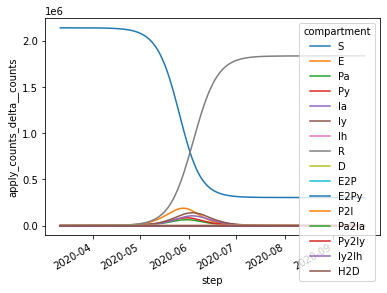

In [143]:
demo_result = main(**cli_pars)

Exposing the parameters after the run isn't possible right now -- `main()` returns only the results object, not the model object. `main()` can be edited to return both in the future.

Saving to `zarr` format because of error with `xr.to_netcdf()` (bug in xarray; traceback includes link to open github issue). Note that xarray can only read `zarr` files written by xarray.

In [144]:
#demo_result.to_zarr('/Users/kpierce/episimlab/results/DemoATX_78712_start.zarr')
demo_result.to_zarr('/Users/kpierce/episimlab/results/DemoATX_78746_start.zarr')

`apply_counts_delta__counts` is the name of the attribute containing the population sizes (counts) for each timestep, compartment, ZCTA, age group, and risk group combination.

In [5]:
data_arr = demo_result['apply_counts_delta__counts']

Use `xr.sel()` to extract the hospitalized ("Ih") compartment, and sum across risk and age groups.

In [140]:
demo_arr_all_risk = data_arr.sel({'compartment': 'Ih'}).sum(dim=['risk_group', 'age_group'])

Plot the hospitalization curve, with timestep ("step") as the x-axis and ZCTA ("vertex") as individual lines on the plot. The legend is suppressed because it's too large to be useful in this rendering (there are 87 ZCTAs).

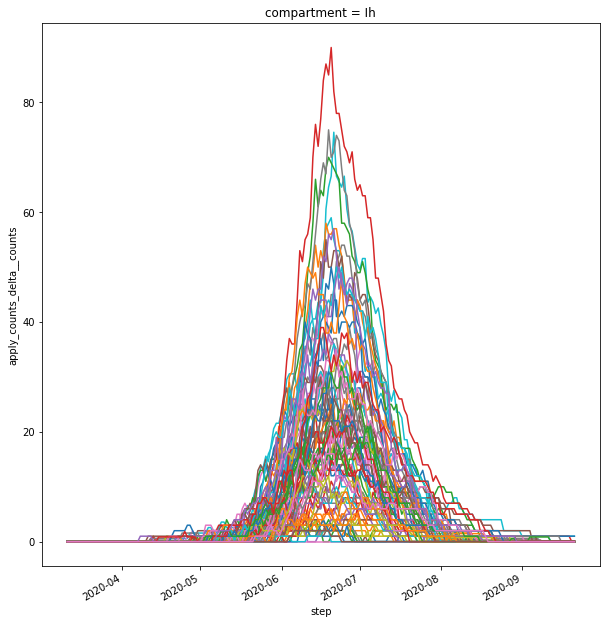

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
demo_arr_all_risk.plot(
    hue='vertex',
    x='step'
)
ax.get_legend().remove()
plt.show()

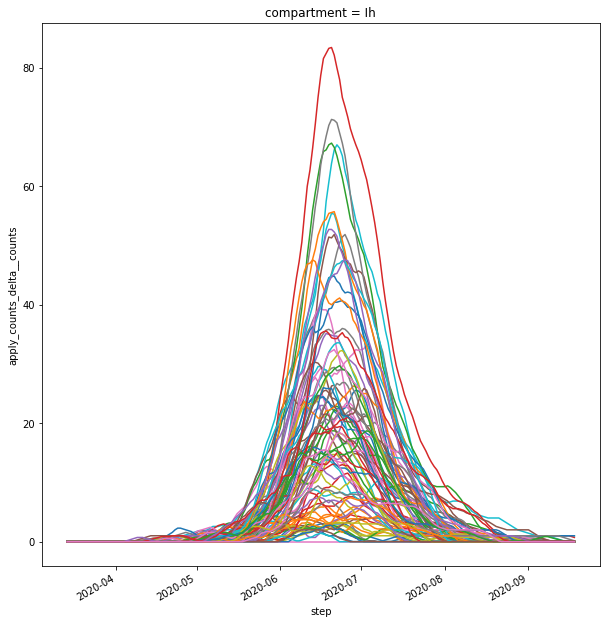

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
demo_arr_all_risk.rolling(
    step=7,
    center=True
).mean().plot(
    hue='vertex',
    x='step'
)
ax.get_legend().remove()
plt.show()

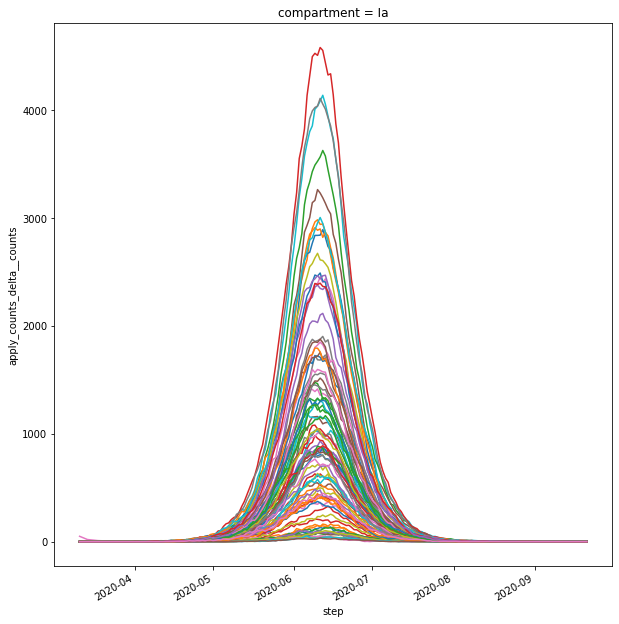

In [9]:
demo_arr_inf = data_arr.sel({'compartment': 'Ia'}).sum(dim=['risk_group', 'age_group'])
fig, ax = plt.subplots(1, 1, figsize=(10,10))
demo_arr_inf.plot(
    hue='vertex',
    x='step'
)
ax.get_legend().remove()
plt.show()

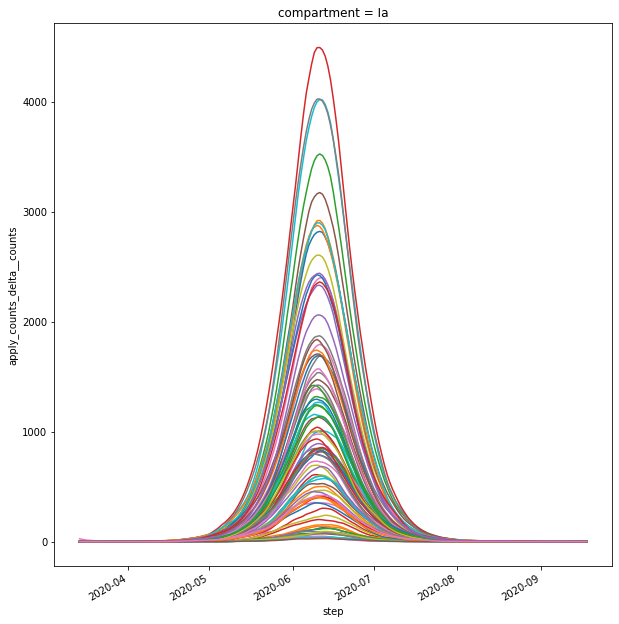

In [57]:
demo_arr_inf = data_arr.sel({'compartment': 'Ia'}).sum(dim=['risk_group', 'age_group'])
fig, ax = plt.subplots(1, 1, figsize=(10,10))
demo_arr_inf.rolling(
    step=7,
    center=True
).mean().plot(
    hue='vertex',
    x='step'
)
ax.get_legend().remove()
plt.show()

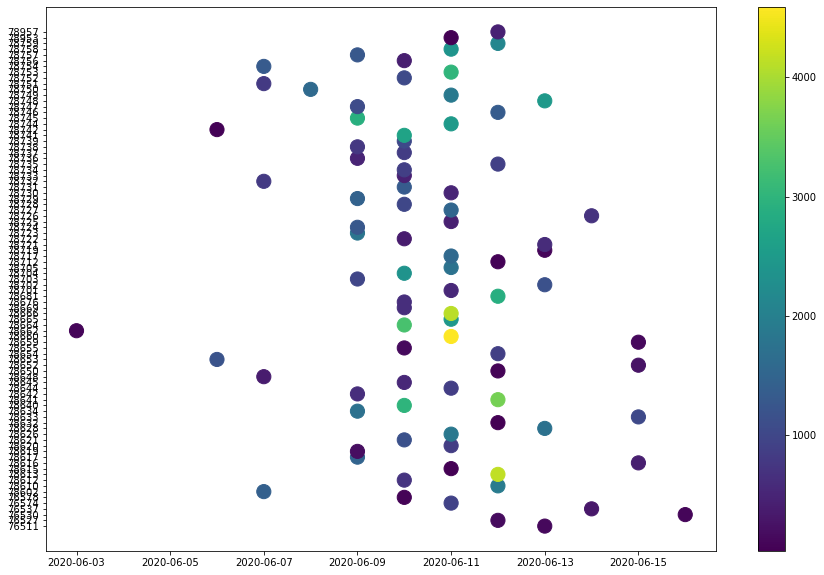

In [100]:
peak_dates = demo_arr_inf['step'][demo_arr_inf.argmax(dim='step')]
peak_infections = demo_arr_inf[demo_arr_inf.argmax(dim='step')]
dates = pd.to_datetime(peak_infections['step'].values)
vertices = [str(i) for i in peak_infections['vertex'].values]
infections = peak_infections.values
color = [str(i/max(infections)) for i in infections]

fig, ax = plt.subplots(1, 1, figsize=(15,10))

plt.scatter(dates, vertices, c=infections, s=200)
plt.colorbar()
plt.show()

In lieu of a unit test, a sanity check that only 78712 had infections at time 0. (**Note** need to amend `DemoATX.py` to allow specification of an age group and a risk group)

In [16]:
data_arr.sel({'compartment': 'Ia', 'vertex': 78712, 'step': min(data_arr['step'].values)})

<xarray.DataArray 'apply_counts_delta__counts' (age_group: 5, risk_group: 2)>
array([[10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.]])
Coordinates:
  * age_group    (age_group) <U5 '18-49' '5-17' '50-64' '65+' '<5'
    compartment  <U5 'Ia'
  * risk_group   (risk_group) <U4 'low' 'high'
    step         datetime64[ns] 2020-03-11
    vertex       int64 78712
Attributes:
    _FillValue:  nan

In [15]:
data_arr.sel({'compartment': 'Ia', 'vertex': np.random.choice(data_arr['vertex'].values), 'step': min(data_arr['step'].values)})

<xarray.DataArray 'apply_counts_delta__counts' (age_group: 5, risk_group: 2)>
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])
Coordinates:
  * age_group    (age_group) <U5 '18-49' '5-17' '50-64' '65+' '<5'
    compartment  <U5 'Ia'
  * risk_group   (risk_group) <U4 'low' 'high'
    step         datetime64[ns] 2020-03-11
    vertex       int64 78626
Attributes:
    _FillValue:  nan

In [17]:
import geopandas as gpd

DEBUG:shapely.geos:Found GEOS DLL: <CDLL '/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/shapely/.dylibs/libgeos_c.1.dylib', handle 7feaca68f200 at 0x12e878310>, using it.
DEBUG:fiona.env:GDAL data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/gdal_data'.
DEBUG:fiona.env:PROJ data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/proj_data'.
DEBUG:fiona.env:Entering env context: <fiona.env.Env object at 0x12ead7a10>
DEBUG:fiona.env:Starting outermost env
DEBUG:fiona.env:No GDAL environment exists
DEBUG:fiona.env:New GDAL environment <fiona._env.GDALEnv object at 0x12ead7a90> created
DEBUG:fiona._env:GDAL data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/gdal_data'.
DEBUG:fiona._env:PROJ data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/proj_data'.
DEBUG:fiona._env:Started GDALEnv: self=<fiona

In [37]:
atx_zcta = gpd.read_file('/Users/kpierce/COVID19/austin-spatial-prev/central_tx_zcta_2019.shp')

DEBUG:fiona.env:Entering env context: <fiona.env.Env object at 0x133739950>
DEBUG:fiona.env:Starting outermost env
DEBUG:fiona.env:No GDAL environment exists
DEBUG:fiona.env:New GDAL environment <fiona._env.GDALEnv object at 0x133739c10> created
DEBUG:fiona._env:GDAL data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/gdal_data'.
DEBUG:fiona._env:PROJ data found in package: path='/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/fiona/proj_data'.
DEBUG:fiona._env:Started GDALEnv: self=<fiona._env.GDALEnv object at 0x133739c10>.
DEBUG:fiona.env:Updated existing <fiona._env.GDALEnv object at 0x133739c10> with options {}
DEBUG:fiona.env:Entered env context: <fiona.env.Env object at 0x133739950>
DEBUG:fiona._shim:Set option b'DTYPE': b"{'GEOID10': <class 'int'>}"
DEBUG:fiona.ogrext:Got coordinate system
DEBUG:fiona.ogrext:OLC_FASTSETNEXTBYINDEX: 1
DEBUG:fiona.ogrext:OLC_FASTFEATURECOUNT: 1
DEBUG:fiona.ogrext:Next index: 0
DEBUG:fiona

In [104]:
peak_inf_df = peak_infections.to_dataframe().reset_index()

In [117]:
from datetime import datetime

In [125]:
peak_inf_df['date'] = [int(datetime.strftime(pd.to_datetime(i), '%Y%m%d')) for i in peak_inf_df['step'].values]

In [121]:
peak_inf_df.head()

,vertex,compartment,step,apply_counts_delta__counts,date
0,76511,Ia,2020-06-13,136.49,20200613
1,76527,Ia,2020-06-12,163.03,20200612
2,76530,Ia,2020-06-16,94.74,20200616
3,76537,Ia,2020-06-14,327.74,20200614
4,76574,Ia,2020-06-11,933.74,20200611


In [106]:
peak_inf_df['vertex'] = [str(i) for i in peak_inf_df['vertex']]

In [126]:
atx_peak = gpd.GeoDataFrame(
    pd.merge(peak_inf_df, atx_zcta, left_on='vertex', right_on='GEOID10', how='left'),
    crs=atx_zcta.crs
)

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [45]:
start_zip = atx_zcta[atx_zcta['GEOID10'] == '78712']

Text(0.5, 1.0, 'Peak asymptomatic infection date')

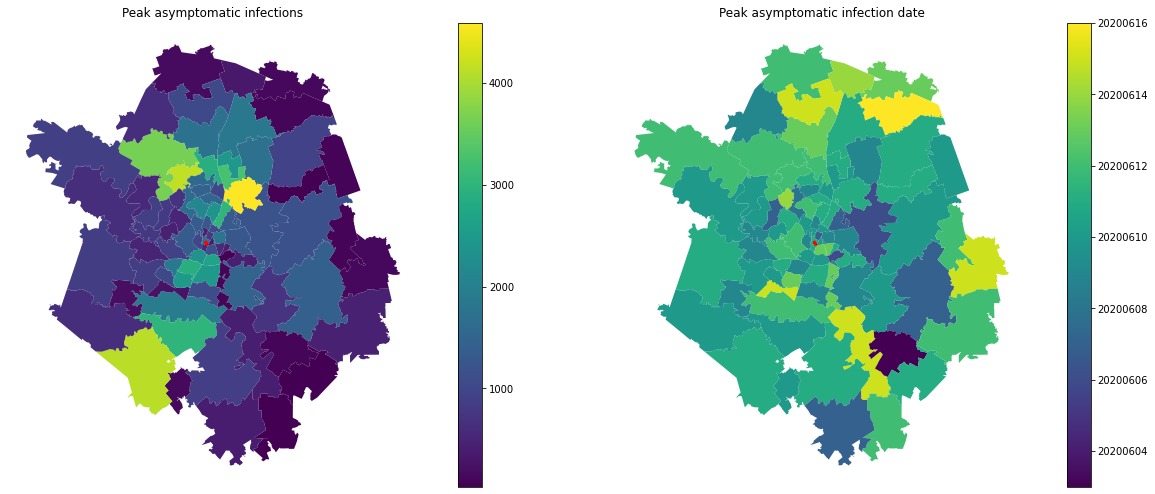

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)

ax[0].set_axis_off()
atx_peak.plot(column='apply_counts_delta__counts', ax=ax[0], legend=True, cax=cax)
start_zip.geometry.boundary.plot(color=None, edgecolor='red', lw=1, ax=ax[0])
ax[0].set_title('Peak asymptomatic infections')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)

ax[1].set_axis_off()
atx_peak.plot(column='date', ax=ax[1], legend=True, cax=cax, legend_kwds={'format': '%.0f'})
start_zip.geometry.boundary.plot(color=None, edgecolor='red', lw=1, ax=ax[1])
ax[1].set_title('Peak asymptomatic infection date')

# Decision support vis ideas

... to prototype in a different notebook

- for hospital capacity planning: timing of peak hospitalizations by ZCTA as horizontal boxplots generated by some number of simulations. x axis = time, y axis = ZCTA (categorial axis) 

- for general public health capacity planning (e.g. tests, contact tracing staff, public awareness campaigns): timing of peak infections using the same design as above (**NOTE**: we only provided hospital decision support because we fit to hospitalization data; we should be skeptical of infection peak results that are not fit to infection data)

# Decision making considerations

- what scale of analysis and/or visualization best informs decision making? (e.g. city council districts?)
- who should care about analytic findings? (who is the audience)
- who is accountable for taking action?
- analytic questions should be mutually beneficial to researchers and stakeholders (some research questions produce answers that can do harm in communities through stigma or misinterpretation)

# Equity-driven approaches to parameterizing the model

- Can we use ZCTA-based labor composition to better understand contact patterns? 
    - Assume that work-related contacts are hard to modify, particularly for certain job categories.
    - ZCTAs can be stratified by work/home and labor type, and that stratification can go into `travel_df` (longer term, add support for flexible axis definitions in contact partitioning and `BruteForceSEIR`)

# Appendix - Data munging

## Rationale for data requirements

The model requires three data files to run:
- "travel dataframe" is derived from safegraph mobility and contains source, destination, date, age, and population (n)
- "contact dataframe" is the the baseline per capita contact probability derived from the Polymod study
- "census dataframe" is the standing population of each ZCTA

The census dataframe is used to initialize the susceptible population sizes at the start of a model run. A small number of infected individuals are pulled out of the specified ZCTA to seed the epidemic (note: this example does not include a "risk group" axis in the census data, so the population is by default "low risk". It looks like a PR to modify `counts.InitCountsFromCensusCSV` will be needed to add ability to parse a risk dimension.

Travel and contact dataframes are used to generate the contact matrix using the `Partition` process in episimlab. Partitioning is done for each time step in the model.

## Load `travel.csv`

In [5]:
tr2020 = pd.read_csv('/Users/kpierce/COVID19/safegraph_mobility/2020_travel_for_contact_partitioning.csv')

In [6]:
tr2020.head()

,Unnamed: 0,source,destination,age,n,date,destination_type
0,0,76511,76511,<5,47.377358,2020-05-30,local
1,1,76511,76511,18-49,638.320755,2020-05-30,local
2,2,76511,76511,5-17,202.754717,2020-05-30,local
3,3,76511,76511,50-64,223.641509,2020-05-30,local
4,4,76511,76511,65+,164.037736,2020-05-30,local


In [114]:
all_zcta = set(tr2020['source'].unique()).union(set(tr2020['destination'].unique()))

In [116]:
names = ["source", "destination", "age", "date"]
multi_ind = pd.MultiIndex.from_product(
    [all_zcta, all_zcta, tr2020['age'].unique(), tr2020['date'].unique()], 
    names=names)
tr2020_full = tr2020.set_index(names).reindex(multi_ind, fill_value=0).reset_index()

In [124]:
start_date = '2020-03-11'
end_date = '2020-09-21'
first_wave = tr2020_full[(tr2020_full['date'] < end_date) & (tr2020_full['date'] >= start_date)]
first_wave.to_csv('/Users/kpierce/episimlab/data/full_first_wave_2020_travel.csv')

## Debugging 3/21/2020

This date causes an assertion error in contact partitioning:

    ~/episimlab/episimlab/partition/partition.py in get_phi(self)
        405         self.phi_t.loc[dict(risk_group1='high', risk_group2='high')] = self.contact_xr
        406         self.phi_t.loc[dict(risk_group1='high', risk_group2='low')] = self.contact_xr
    --> 407         assert not self.phi_t.isnull().any()
        408 
        409     def initialize_misc_coords(self):

    AssertionError: 
    
Problem is fixed above, but retaining these code blocks as notes for identifying problem data.

In [7]:
start_date = '2020-03-11'
end_date = '2020-09-21'
first_wave = tr2020[(tr2020['date'] < end_date) & (tr2020['date'] >= start_date)]

In [8]:
first_wave.to_csv('/Users/kpierce/episimlab/data/first_wave_2020_travel.csv')

In [12]:
debug = tr2020[(tr2020['date'] >= '2020-03-20') & (tr2020['date'] <= '2020-03-23')]
debug.to_csv('/Users/kpierce/episimlab/data/debug_2020_03.csv')

In [24]:
problem_date = debug[debug['date'] == '2020-03-21']
problem_date.to_csv('/Users/kpierce/episimlab/data/debug_20200321_travel.csv')

In [25]:
part = partition.Partition2Contact(
    travel_fp = '/Users/kpierce/episimlab/data/debug_20200321_travel.csv',
    contacts_fp = '/Users/kpierce/episimlab/data/polymod_contacts.csv'
)

In [27]:
part.initialize(
    step_delta=np.timedelta64(24, 'h'),
    step_start=np.datetime64('2020-03-21T00:00:00.000000000'),
    step_end=np.datetime64('2020-03-22T00:00:00.000000000')
)

DEBUG:root:'load_travel_df' took 0.03 seconds
DEBUG:root:step_start: 2020-03-21T00:00:00.000000000
DEBUG:root:step_end: 2020-03-21T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-20 18:18:10.055960


The date in Partition.get_travel_df is ['2020-03-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-20 18:18:17.640700
DEBUG:root:Starting pandas merge 1 at 2021-07-20 18:18:17.641408
DEBUG:root:Starting pandas merge 2 at 2021-07-20 18:18:23.153807
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-20 18:18:27.330951
DEBUG:root:'dask_partition' took 19.03 seconds
DEBUG:root:Building contact xarray at 2021-07-20 18:18:29.307892


In [28]:
part.run_step(
    step_delta=np.timedelta64(24, 'h'),
    step_start=np.datetime64('2020-03-21T00:00:00.000000000'),
    step_end=np.datetime64('2020-03-22T00:00:00.000000000')
)

DEBUG:root:step_start: 2020-03-21T00:00:00.000000000
DEBUG:root:step_end: 2020-03-22T00:00:00.000000000
DEBUG:root:Starting dask merge at 2021-07-20 18:18:46.136250


The date in Partition.get_travel_df is ['2020-03-21T00:00:00.000000000']


DEBUG:root:Finishing dask merge at 2021-07-20 18:18:53.147912
DEBUG:root:Starting pandas merge 1 at 2021-07-20 18:18:53.148637
DEBUG:root:Starting pandas merge 2 at 2021-07-20 18:18:57.253766
DEBUG:root:Calculating contact probabilities on full dataframe starting at 2021-07-20 18:19:01.391294
DEBUG:root:'dask_partition' took 17.02 seconds
DEBUG:root:Building contact xarray at 2021-07-20 18:19:03.366629


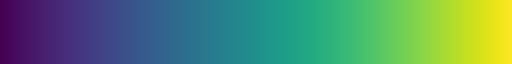

In [85]:
current_cmap

/Users/kpierce/episimlab/esl-venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  This is separate from the ipykernel package so we can avoid doing imports until


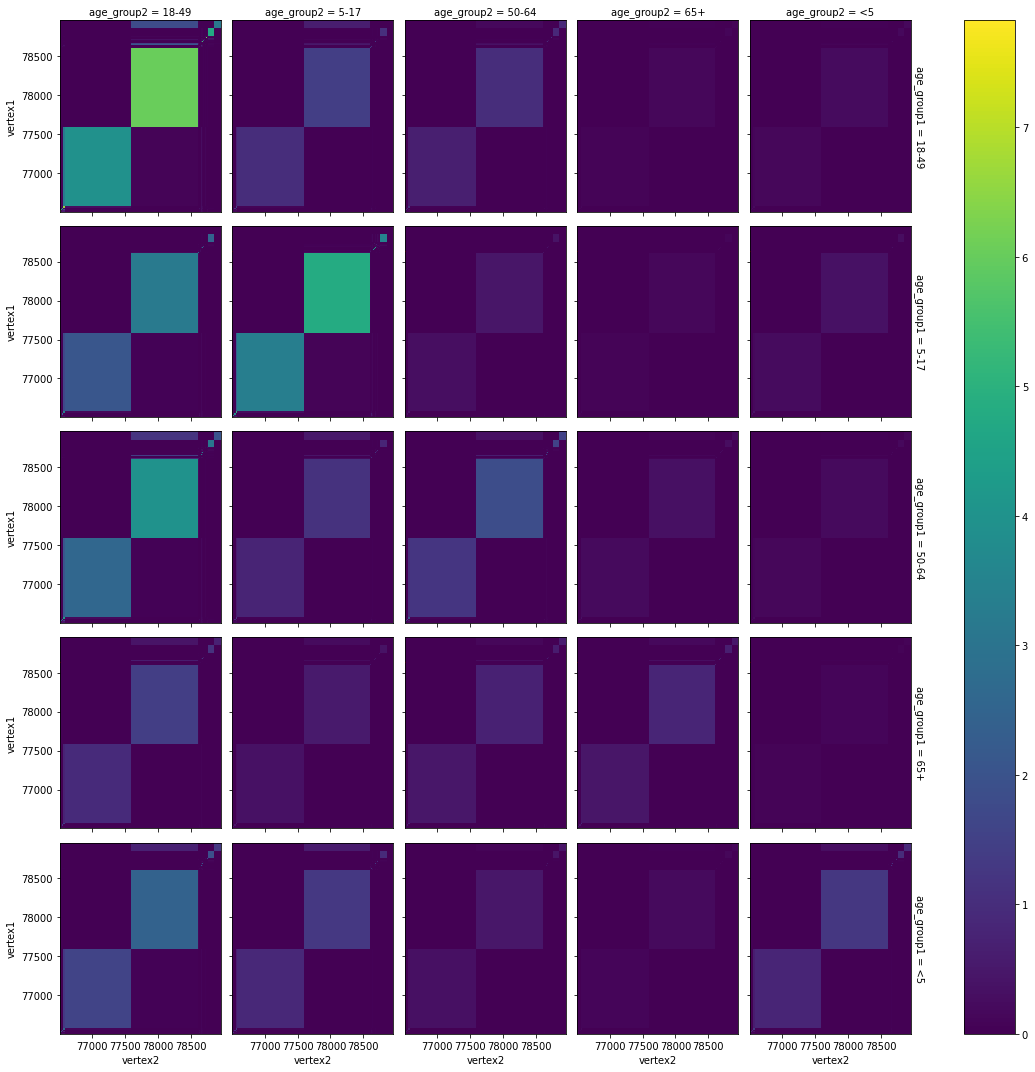

In [86]:
import matplotlib
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')
part.contact_xr.plot(row='age_group1', col='age_group2')

In [101]:
np.argwhere(np.isnan(part.contact_xr.values))

array([[ 0, 18,  0,  0],
       [ 0, 18,  0,  1],
       [ 0, 18,  0,  2],
       [ 0, 18,  0,  3],
       [ 0, 18,  0,  4],
       [ 0, 18,  1,  0],
       [ 0, 18,  1,  1],
       [ 0, 18,  1,  2],
       [ 0, 18,  1,  3],
       [ 0, 18,  1,  4],
       [ 0, 18,  2,  0],
       [ 0, 18,  2,  1],
       [ 0, 18,  2,  2],
       [ 0, 18,  2,  3],
       [ 0, 18,  2,  4],
       [ 0, 18,  3,  0],
       [ 0, 18,  3,  1],
       [ 0, 18,  3,  2],
       [ 0, 18,  3,  3],
       [ 0, 18,  3,  4],
       [ 0, 18,  4,  0],
       [ 0, 18,  4,  1],
       [ 0, 18,  4,  2],
       [ 0, 18,  4,  3],
       [ 0, 18,  4,  4],
       [18,  0,  0,  0],
       [18,  0,  0,  1],
       [18,  0,  0,  2],
       [18,  0,  0,  3],
       [18,  0,  0,  4],
       [18,  0,  1,  0],
       [18,  0,  1,  1],
       [18,  0,  1,  2],
       [18,  0,  1,  3],
       [18,  0,  1,  4],
       [18,  0,  2,  0],
       [18,  0,  2,  1],
       [18,  0,  2,  2],
       [18,  0,  2,  3],
       [18,  0,  2,  4],


In [107]:
bad_zip_18 = part.contact_xr['vertex1'][18].values.item()
bad_zip_0 = part.contact_xr['vertex1'][0].values.item()

In [105]:
problem_date.head()

,Unnamed: 0,source,destination,age,n,date,destination_type
3818700,3818700,76511,76511,<5,62.911765,2020-03-21,local
3818701,3818701,76511,76511,18-49,847.617647,2020-03-21,local
3818702,3818702,76511,76511,5-17,269.235294,2020-03-21,local
3818703,3818703,76511,76511,50-64,296.970588,2020-03-21,local
3818704,3818704,76511,76511,65+,217.823529,2020-03-21,local


In [109]:
problem_date[(problem_date['source'] == bad_zip_18) & (problem_date['destination'] == bad_zip_0)]

,Unnamed: 0,source,destination,age,n,date,destination_type


In [110]:
problem_date[(problem_date['source'] == bad_zip_0) & (problem_date['destination'] == bad_zip_18)]

,Unnamed: 0,source,destination,age,n,date,destination_type


Contact partitioning fails because there is no travel between these zip codes on this date.

In [122]:
tr2020_full[
    (tr2020_full['source'] == bad_zip_18) & \
    (tr2020_full['destination'] == bad_zip_0) & \
    (tr2020_full['date'] == '2020-03-21')]

,source,destination,age,date,Unnamed: 0,n,destination_type
2883136,78632,76511,<5,2020-03-21,0,0.0,0
2883467,78632,76511,18-49,2020-03-21,0,0.0,0
2883798,78632,76511,5-17,2020-03-21,0,0.0,0
2884129,78632,76511,50-64,2020-03-21,0,0.0,0
2884460,78632,76511,65+,2020-03-21,0,0.0,0


In [123]:
tr2020_full[
    (tr2020_full['destination'] == bad_zip_18) & \
    (tr2020_full['source'] == bad_zip_0) & \
    (tr2020_full['date'] == '2020-03-21')]

,source,destination,age,date,Unnamed: 0,n,destination_type
321196,76511,78632,<5,2020-03-21,0,0.0,0
321527,76511,78632,18-49,2020-03-21,0,0.0,0
321858,76511,78632,5-17,2020-03-21,0,0.0,0
322189,76511,78632,50-64,2020-03-21,0,0.0,0
322520,76511,78632,65+,2020-03-21,0,0.0,0


# Load `contact.csv`

In [6]:
polymod = pd.read_csv('/Users/kpierce/episimlab/data/polymod_contacts.csv')

In [7]:
polymod

,Unnamed: 0,age1,age2,daily_per_capita_contacts
0,0,<5,<5,2.160941
1,1,5-17,<5,0.597341
2,2,18-49,<5,0.382203
3,3,50-64,<5,0.352397
4,4,65+,<5,0.189756


# Load `census.csv`

In [16]:
census = pd.read_csv('/Users/kpierce/episimlab/data/data_lccf/census_pop1_rows1.csv')

In [17]:
census.head()

,Unnamed: 0,GEOID,NAME,age_bin,group_pop
0,1,75001,ZCTA5 75001,<5,794
1,2,75001,ZCTA5 75001,18-49,9420
2,3,75001,ZCTA5 75001,5-17,1404
3,4,75001,ZCTA5 75001,50-64,2259
4,5,75001,ZCTA5 75001,65+,1115


In [18]:
census[census['GEOID'] == 78712]

,Unnamed: 0,GEOID,NAME,age_bin,group_pop
7590,7591,78712,ZCTA5 78712,<5,0
7591,7592,78712,ZCTA5 78712,18-49,871
7592,7593,78712,ZCTA5 78712,5-17,9
7593,7594,78712,ZCTA5 78712,50-64,0
7594,7595,78712,ZCTA5 78712,65+,0


In [21]:
first_wave = pd.read_csv('/Users/kpierce/episimlab/data/full_first_wave_2020_travel.csv')

(array([1.0822e+04, 2.2700e+02, 3.5000e+01, 2.2000e+01, 2.2000e+01,
        3.1000e+01, 4.3000e+01, 3.2000e+01, 9.0000e+00, 9.0000e+00]),
 array([6.28491620e-03, 6.22607384e+01, 1.24515192e+02, 1.86769645e+02,
        2.49024099e+02, 3.11278552e+02, 3.73533006e+02, 4.35787459e+02,
        4.98041913e+02, 5.60296366e+02, 6.22550820e+02]),
 <BarContainer object of 10 artists>)

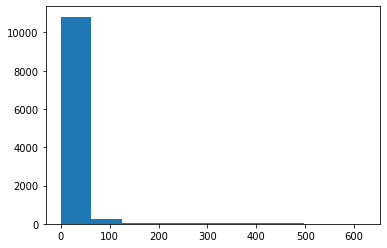

In [23]:
plt.hist(first_wave[(first_wave['source'] == 78712) & (first_wave['n'] > 0)]['n'])